<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left">Visualización de datos</h1>

<h2 align="left"><i>Congestión del tráfico en intersecciones viales</i></h2>

<p align="left">
  <h3>Joseph F. Vergel-Becerra | Introducción a Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>15/10/2023</i>
  <br><br>
  <a href="#tabla-de-contenido">Tabla de contenido</a> •
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a> •
  <a href="#agradecimientos">Agradecimientos</a>
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-beginners-course/blob/main/6-python-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-ml-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Optimizar el tiempo de entrega al maximo, es uno de los principales objetivos que las empresas logistica de ultima milla definen como crucial en sus operaciones. Ahora bien, imagina que te acaban de contratar en el equipo de ciencia de datos de una de estas compañias y tu primer reto es ***\"optimizar las rutas y entregas para que tomen el menor tiempo posible\"***. Para ello cuentas con datos referentes a la congestion del trafico en las ciudades en las que la empresa opera y debes diseñar e implementar una prueba de concepto (PoC del ingles *Proof-of-Concept*) que agregue valor a la compañia.

<a id='tabla-de-contenido'></a>
## Tabla de contenido

<ol>
    <li><a href="#1-preludio"><b>Preludio</b></a></li>
    <li><a href="#2-matplotlib"><b>Matplotlib</b></a></li>
    <ol type="i">
        <li><a href="#i-basicos">Gráficos básicos: línea, barras, histogramas</a></li>
        <li><a href="#ii-personalizacion">Personalización de gráficos</a></li>
    </ol>
    <li><a href="#3-seaborn"><b>Seaborn</b></a></li>
    <ol type="i">
        <li><a href="#i-estadisticos">Gráficos estadísticos</a></li>
        <li><a href="#ii-heatmaps">Heatmaps y pairplots</a></li>
    </ol>
    <li><a href="#4-otros"><b>Otras Herramientas</b></a></li>
    <ol type="i">
        <li><a href="#i-interactivos">Gráficos interactivos</a></li>
        <li><a href="#ii-geoespaciales">Gráficos geoespaciales</a></li>
    </ol>
    <li><a href="#ejercicios"><b>Ejercicios caso practico: "Visualización de Datos"</b></a></li>
</ol>

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


<a id='definiendo-el-problema'></a>
## 1. Definiendo el problema y los objetivos

Es comun que los objetivos que trazan los [C levels](https://academia.crandi.com/negocios-digitales/ejecutivos-c-level/) de las compañias, son definidos en terminos de la planeacion estrategica y los objetivos de negocio de sus respectivas divisiones. Nuestro caso no es la excepción, pues ***\"Optimizar las rutas y entregas para que tomen el menor tiempo posible\"***, es un objetivo que seguramente requerirá más de una solución basada en datos y no existirá un único modelo "mágico" que lo consiga con alta precisión. No obstante, un muy buen primer paso dentro de la etapa de **entendimiento del negocio**, es plantear una hipótesis referente a  analizar lo que la intuición y el sentido común nos sugieren. Es por esto que se puede pensar que:
<br><br>

<div class="remark" id="hypotesis-1">
<b>Hipótesis 1:</b> La congestión del tráfico en las ciudades de operación, es posiblemente la principal causa de retrasos en las entregas.
</div><br>

En un problema real de tipo industrial, tener bien definidos y delimitados los objetivos en proyecto de ciencia de datos, no es algo imposible, pero tampoco es la realidad en la gran mayoría de casos. A medida que se van analizando los datos, el equipo debe ir analizando y reformulando los objetivos acorde a la información y los insumos con los que dispone el proyecto. Por consiguiente, mientras avanzamos en el entendimiento, el planteamiento del problema y el desarrollo de la solución, iremos definiendo los objetivos específicos.

<a id="trabajando-con-datos"></a>
## 2. Trabajando con datos reales y una mirada general

El proyecto inició hace un par de meses y en tu tarea de empalme, solo recibiste la información recolectada. Los datos proporcionados consisten de **métricas de registros de viajes agregados**, para varias flotas de vehículos comerciales de tipo semirremolque. La Fig. 1 muestra la metodología de recolección de datos del proveedor.

<p align="center">
  <a target="_blank">
    <img width="400px" src="https://assets-global.website-files.com/5f2a93fe880654a977c51043/60ca13eef83c460f414f849a_image6.gif" alt="intersection-ai">
  </a><br>
  <b>Figura 1:</b> Análisis de detección de objetos y segmentación de una cámara aérea, para una de las intersecciones viales proporcionada por el proveedor de los datos¹.
</p>

Ahora bien, al ser un problema de ***big data²***, el proveedor **agrupó los datos por intersección vial, mes, hora del día, dirección conducida a través de la intersección y si el día fue fin de semana o no**. Dentro de la poca documentación que entregó el anterior científico de datos, se encontró en un `README.md` la siguiente nota con respecto a la agregación de los datos:

> *Bajo nuestro diseño y por solicitud nuestra, se le solicitó al proveedor de los datos la información de tres cuantiles diferentes, de dos métricas diferentes, que cubren cuánto tiempo le tomó al grupo de vehículos atravesar la intersección. Específicamente, los percentiles 20, 50 y 80 para el tiempo total detenido en una intersección `TotalTimeStopped` y la distancia entre la intersección y el primer lugar donde se detuvo un vehículo mientras esperaba `DistanceToFirstStop`.³*

A continuación, la siguiente celda verifica la existencia del archivo original de datos y si no ha sido descargado, creará el directorio, descargará el archivo y lo descomprimirá. Al contar con los datos, el primer paso es enmarcar el problema al que nos enfrentaremos.

---

¹ <a href="https://www.mapbox.com/blog/300-more-lane-guidance-for-navigation-powered-by-ai-mapping">mapbox: 300% More Lane Guidance For Navigation Powered By Ai Mapping</a>.<br>
² Ver parte 1: Ejercicio 1.<br>
³ Ver parte 1: Ejercicio 2.

In [2]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "bigquery-geotab-intersection-congestion"
DATA_PATH = f"datasets/{DATASET}/"


def load_traffic_congestion_data(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


load_traffic_congestion_data(dataset=DATASET)

[INFO] Dataset 'bigquery-geotab-intersection-congestion' downloaded and uncompressed correctly!


### 2.A Enmarcar el problema

Para enmarcar el problema es necesario responder las siguientes preguntas:

- **Pregunta 1:** ¿Es supervisado, semisupervisado, no supervisado o de refuerzo?
- **Pregunta 2:** ¿Es una tarea de clasificación, una tarea de regresión o algo más?
- **Pregunta 3:** ¿Deberías utilizar técnicas de aprendizaje *online* o por lotes (*batch*)?

Una vez se nos ha suministrado la información, analicemos con qué archivos contamos y de qué tipo. De esta manera intentaremos responder estas preguntas claves.

Utilicemos la biblioteca [`os`](https://docs.python.org/es/3.10/library/os.html) del *core* de `python`, que en términos generales nos permite ejecutar funcionalidades propias del sistema operativo (OS: *Operative System*). Nos interesa visualizar los archivos presentes en directorio y podremos hacerlo desde `jupyter` con tan solo ejecutar la siguiente celda:

In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/bigquery-geotab-intersection-congestion/":

['submission_metric_map', 'BigQuery-Dataset-Access.md', 'test.csv', 'train.csv', 'submission_metric_map.json', 'sample_submission.csv']


En la anterior salida de celda (*output*), vemos que contamos con `'test.csv'` y `'train.csv'`. Estos dos archivos son precisamente los que contienen la información principal entregada por el proveedor.<br><br>

<div class="tip">
    <b>Tip:</b> <i>Los archivos CSV (del inglés comma-separated values) son un tipo de documento en formato abierto sencillo para representar datos en forma de tabla.⁴</i> Muchas de las bases de datos modernas permiten exportar datos en el formato CSV, por lo que es muy usual solicitarlos y/o recibirlos de esta manera.
</div><br>

Disponiendo de la información, utilicemos la biblioteca [pandas](https://pandas.pydata.org/) para cargarla, manipularla y analizarla.

> *\"pandas es una herramienta de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar, construida sobre el lenguaje de programación Python\"*.

---

⁴ <a href="https://es.wikipedia.org/wiki/Valores_separados_por_comas">Wikipeida: Valores separados por comas</a>.<br>

In [4]:
import os

import pandas as pd

train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    
    print(f"\n[INFO] testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (856387, 28)


RowId  IntersectionId   Latitude  Longitude  \
0  1921357               0  33.791659 -84.430032   
1  1921358               0  33.791659 -84.430032   
2  1921359               0  33.791659 -84.430032   
3  1921360               0  33.791659 -84.430032   
4  1921361               0  33.791659 -84.430032   

                EntryStreetName                ExitStreetName EntryHeading  \
0  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   

  ExitHeading  Hour  Weekend  Month  \
0          NW     0        0      6   
1          SE     0        0      6   
2          NW     1        0      6   
3          SE     1        0      6   
4          NW     2        0      6   

                                                Path  TotalTimeStopped_p20  \
0  Marietta Boulevard Northwest_NW_Marietta Boule...                   0.0   
1  Marietta Boulevard Northwest_SE_Marietta Boule...                   0.0   
2  Marietta Boulevard Northwest_NW_Marietta Boule...                   0.0   
3  Marietta Boulevard Northwest_SE_Marietta Boule...                   0.0   
4  Marietta Boulevard Northwest_NW_Marietta Boule...                   0.0   

   TotalTimeStopped_p40  TotalTimeStopped_p50  TotalTimeStopped_p60  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   TotalTimeStopped_p80  TimeFromFirstStop_p20  TimeFromFirstStop_p40  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   

   TimeFromFirstStop_p50  TimeFromFirstStop_p60  TimeFromFirstStop_p80  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   DistanceToFirstStop_p20  DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   DistanceToFirstStop_p60  DistanceToFirstStop_p80     City  
0                      0.0                      0.0  Atlanta  
1                      0.0                      0.0  Atlanta  
2                      0.0                      0.0  Atlanta  
3                      0.0                      0.0  Atlanta  
4                      0.0                      0.0  Atlanta


[INFO] testing dataset dimnesions (rows, cols): (1921357, 13)


RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094 -84.393032  Peachtree Street Southwest   
1      1               1  33.75094 -84.393032  Peachtree Street Southwest   
2      2               1  33.75094 -84.393032  Peachtree Street Southwest   
3      3               1  33.75094 -84.393032  Peachtree Street Southwest   
4      4               1  33.75094 -84.393032  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
0  Peachtree Street Southwest           NE          NE     0        0      6   
1   Mitchell Street Southwest           SW          SE     0        0      6   
2  Peachtree Street Southwest           SW          SW     0        0      6   
3  Peachtree Street Southwest           NE          NE     1        0      6   
4  Peachtree Street Southwest           SW          SW     1        0      6   

                                                Path     City  
0  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
1  Peachtree Street Southwest_SW_Mitchell Street ...  Atlanta  
2  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
3  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
4  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921357 entries, 0 to 1921356
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   RowId            int64  
 1   IntersectionId   int64  
 2   Latitude         float64
 3   Longitude        float64
 4   EntryStreetName  object 
 5   ExitStreetName   object 
 6   EntryHeading     object 
 7   ExitHeading      object 
 8   Hour             int64  
 9   Weekend          int64  
 10  Month            int64  
 11  Path             object 
 12  City             object 
dtypes: float64(2), int64(5), object(6)
memory usage: 190.6+ MB
None


In [7]:
print("[INFO] Columns of trainig dataset: \n", train.columns)
print("\n[INFO] Columns of trainig dataset: \n", test.columns)
print(
    "\n[INFO] Difference between training columns set and testing columns set: \n",
    set(train.columns) - set(test.columns)
)

[INFO] Columns of trainig dataset: 
 Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City'],
      dtype='object')

[INFO] Columns of trainig dataset: 
 Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'City'],
      dtype='object')

[INFO] Difference between training columns set and testing columns set: 
 {'TotalTimeS

Según lo que planteamos en la <a href="#hypotesis-1">Hipótesis 1</a>, nuestra primera intuición es que ***a mayor congestión vehicular, mayores serán los tiempos de entrega***. Esta apreciación parece coincidir con la visión de problema que el anterior científico de datos consideró en el diseño de la etapa de adquisición y recolección de datos y que además plasmó en la documentación `README.md`. Esta correspondencia se argumenta al analizar las variables presentes en el conjunto de *train* y que no están presentes en el conjunto de *test*:

- **TotalTimeStopped**
    - TotalTimeStopped_p20
    - TotalTimeStopped_p40
    - TotalTimeStopped_p50
    - TotalTimeStopped_p60
    - TotalTimeStopped_p80
- **DistanceToFirstStop**
    - DistanceToFirstStop_p20
    - DistanceToFirstStop_p40
    - DistanceToFirstStop_p50
    - DistanceToFirstStop_p60
    - DistanceToFirstStop_p80
- TimeFromFirstStop
    - TimeFromFirstStop_p20
    - TimeFromFirstStop_p40
    - TimeFromFirstStop_p50
    - TimeFromFirstStop_p60
    - TimeFromFirstStop_p80


Esto nos indica que las variables a predecir (*targets*) son **TotalTimeStopped**, **DistanceToFirstStop** y **TimeFromFirstStop**. Sin embargo, si pensamos detalladamente en el "significado" de estos tres tipos de variables, veremos que:

- **DistanceToFirstStop** es la distancia antes de la intersección en la que el vehículo se detuvo por primera vez, antes de llegar a la intersección y en donde espero para poder cruzar la intersección. ***Esta distancia está asociada a cuántos vehículos están \"represados\" en la intersección, e.g., a mayor distancia, significa que hay más vehículos esperando poder cruzar la intersección.***
- **TotalTimeStopped** es el tiempo que estuvo detenido el vehículo en la primera parada, esperando poder cruzar la intersección. ***Evidentemente, entre mayor sea el tiempo de espera, es un indicio de mayor congestión vehicular.***
- **TimeFromFirstStop** es una variable de la que no hemos recibido ningún tipo de informacion. Este es un escenario bastante frecuente en el desarrollo de proyectos con un componente de ciencia de datos. No obstante, a partir del contexto que nos dan las variables **DistanceToFirstStop** y **TotalTimeStopped**, podemos inferir que **TimeFromFirstStop** es el tiempo que tardó en recorrer el vehículo, desde el punto en el que se detuvo y el límite de la intersección en la que cruzó, una vez se reanudó el flujo vehicular.

<div class="remark">
Por lo que podemos concluir que de acuerdo con nuestra <a href="#hypotesis-1">Hipótesis 1</a>, las dos variables que de manera más directa son consecuencia de la congestión vehicular, son <b>DistanceToFirstStop</b> y <b>TotalTimeStopped</b>.
</div><br><br>

<div class="remark">
<b>Respuesta 1:</b> Automáticamente, la definición de las variables <b>DistanceToFirstStop</b> y <b>TotalTimeStopped</b> como los <i>targets</i> del problema y que además no tengan valores faltantes, nos lleva entonces a concluir que este problema estaría enmarcado en el tipo <b>supervisado</b>, i.e., cada instancia viene con el resultado esperado.
</div><br><br>

<div class="tip">
<b>Tip:</b> Una vez definido el/los <i>target/s</i>, es de suprema importancia analizar cómo están distribuidos los datos. Para ellos podemos utilizar el histograma como herramienta de visualización del tipo de distribución de probabilidad subyacente del <i>target</i>.
</div><br>

<a id="3-matplotlib"></a>
## 3. Matplotlib

[INFO] DistanceToFirstStop_p80 (min, max): (0.0, 4079.2)


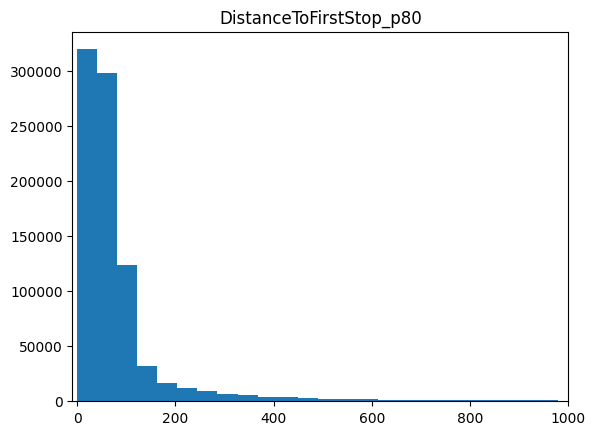

In [8]:
import matplotlib.pyplot as plt


print(
    "[INFO] DistanceToFirstStop_p80 (min, max): "
    f"({train['DistanceToFirstStop_p80'].min()}, {train['DistanceToFirstStop_p80'].max()})"
)
plt.hist(train["DistanceToFirstStop_p80"], bins=100)
plt.title("DistanceToFirstStop_p80")
plt.xlim(-10, 1000)
plt.show()

[INFO] DistanceToFirstStop_p80 (min, max): (0.0, 4079.2)


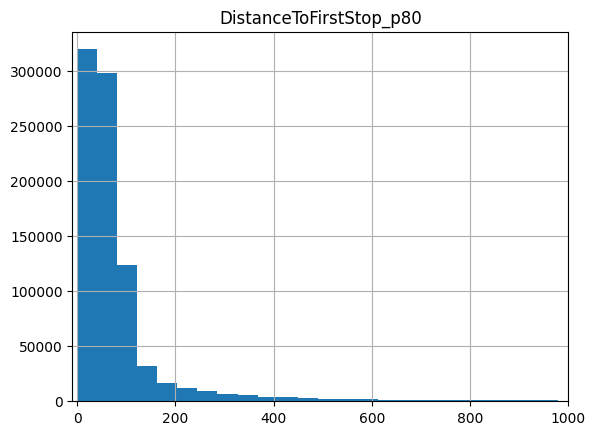

In [9]:
import matplotlib.pyplot as plt


print(
    "[INFO] DistanceToFirstStop_p80 (min, max): "
    f"({train['DistanceToFirstStop_p80'].min()}, {train['DistanceToFirstStop_p80'].max()})"
)
train["DistanceToFirstStop_p80"].hist(bins=100)
plt.title("DistanceToFirstStop_p80")
plt.xlim(-10, 1000)
plt.show()

<div class="warn">
<b>Advertencia:</b> Tenga en cuenta que debe jugar con el parámetro <code>bins</code> a la hora de utilizar el histograma como herramienta para la visualización de la distribución de la data. Si escoge un valor muy pequeño, podría hacerse falsas ideas de la distribución, como se muestra en el gráfico anterior.
</div><br>

[INFO] DistanceToFirstStop_p80 (min, max): (0.0, 4079.2)


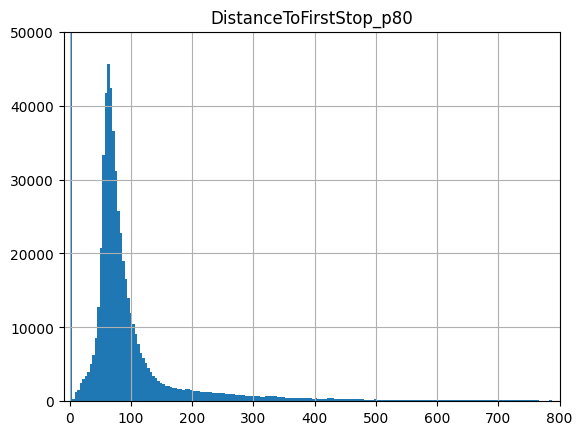

In [10]:
print(
    "[INFO] DistanceToFirstStop_p80 (min, max): "
    f"({train['DistanceToFirstStop_p80'].min()}, {train['DistanceToFirstStop_p80'].max()})"
)
train["DistanceToFirstStop_p80"].hist(bins=1000)
plt.title("DistanceToFirstStop_p80")
plt.xlim(-10, 800)
plt.ylim(0, 50_000)
plt.show()

[INFO] TotalTimeStopped_p80 (min, max): (0.0, 763.0)


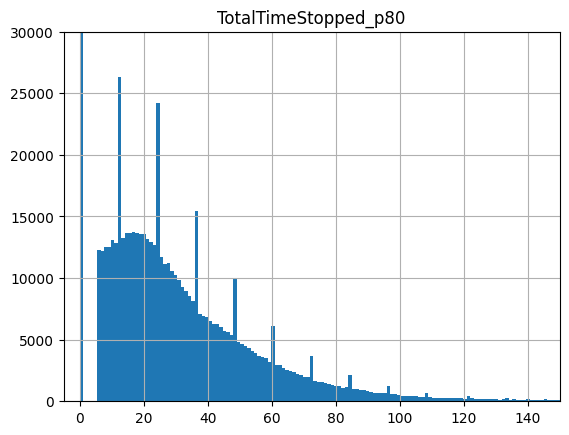

In [11]:
print(
    "[INFO] TotalTimeStopped_p80 (min, max): "
    f"({train['TotalTimeStopped_p80'].min()}, {train['TotalTimeStopped_p80'].max()})"
)
train["TotalTimeStopped_p80"].hist(bins=700)
plt.title("TotalTimeStopped_p80")
plt.xlim(-5, 150)
plt.ylim(0, 30_000)
plt.show()

Sabiendo que para la variable `"IntersectionId"` se tiene números enteros únicos por ciudad. Es posible combinar las variables categóricas `"City"` y `"IntersectionId"`, para obtener un identificador único para cada intersección vial de los conjuntos de entrenamiento y de *test*. Por otra parte, podemos aislar los nombres de las columnas para los *"time targets"* y los *"distance targets"*. Estos pasos pueden considerarse como una breve etapa de preparación de los datos, que facilitará el análisis de los mismos en las siguientes secciones.

In [12]:
train["city_intersec_id"] = train["City"] + pd.Series(["_"] * len(train)) + \
    train["IntersectionId"].astype("string")
test["city_intersec_id"] = test["City"] + pd.Series(["_"] * len(train)) + \
    test["IntersectionId"].astype("string")
counts = train['city_intersec_id'].value_counts()
print(f"[INFO] Number of unique intersections: {len(train['city_intersec_id'].unique())}")
counts = train['city_intersec_id'].value_counts()
print("\n[INFO] Intersection Counts for Train Dataset:\n", counts)
print(f"[INFO] Verified: {counts.sum() == train.shape[0]}")

time_targets = [col for col in list(train.columns) if col.startswith("TotalTimeStopped")]
distance_targets = [col for col in list(train.columns) if col.startswith("DistanceToFirstStop")]

[INFO] Number of unique intersections: 4805

[INFO] Intersection Counts for Train Dataset:
 Atlanta_84          2437
Atlanta_112         2364
Atlanta_158         2206
Atlanta_331         2124
Philadelphia_889    2065
                    ... 
Chicago_1447           1
Chicago_309            1
Philadelphia_572       1
Chicago_1100           1
Chicago_1733           1
Name: city_intersec_id, Length: 4805, dtype: Int64
[INFO] Verified: True


<div class="remark">
<b>Respuesta 3:</b> Finalmente, dado que no hay un flujo continuo de datos que ingresan al sistema, no hay una necesidad particular de adaptarse rápidamente a los datos cambiantes y los datos caben en memoria, por lo que el <b>aprendizaje por lotes</b> funcionará bien.
</div><br><br>

**Validar suposiciones**

Es una buena práctica enumerar y verificar las suposiciones que se han hecho hasta ahora (por usted u otros colaboradores del proyecto); esto puede ayudarlo a detectar problemas graves desde el principio.

Analicemos las características generales de los *[dataframes](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)* de entrenamiento `train` y de pruebas `test`.

In [13]:
train.describe()

RowId  IntersectionId       Latitude      Longitude  \
count  8.563870e+05   856387.000000  856387.000000  856387.000000   
mean   2.349550e+06      833.283384      39.618965     -77.916488   
std    2.472178e+05      654.308913       2.935437       5.952959   
min    1.921357e+06        0.000000      33.649973     -87.862288   
25%    2.135454e+06      291.000000      39.936739     -84.387607   
50%    2.349550e+06      679.000000      39.982974     -75.175055   
75%    2.563646e+06     1264.000000      41.910047     -75.100495   
max    2.777743e+06     2875.000000      42.381782     -71.025550   

                Hour        Weekend          Month  TotalTimeStopped_p20  \
count  856387.000000  856387.000000  856387.000000         856387.000000   
mean       12.431234       0.277880       9.104808              1.755596   
std         6.071843       0.447954       1.991094              7.146549   
min         0.000000       0.000000       1.000000              0.000000   
25%         8.000000       0.000000       7.000000              0.000000   
50%        13.000000       0.000000       9.000000              0.000000   
75%        17.000000       1.000000      11.000000              0.000000   
max        23.000000       1.000000      12.000000            298.000000   

       TotalTimeStopped_p40  TotalTimeStopped_p50  ...  TimeFromFirstStop_p20  \
count         856387.000000         856387.000000  ...          856387.000000   
mean               5.403592              7.722655  ...               3.181096   
std               12.981674             15.685910  ...              11.835994   
min                0.000000              0.000000  ...               0.000000   
25%                0.000000              0.000000  ...               0.000000   
50%                0.000000              0.000000  ...               0.000000   
75%                0.000000             10.000000  ...               0.000000   
max              375.000000            375.000000  ...             337.000000   

       TimeFromFirstStop_p40  TimeFromFirstStop_p50  TimeFromFirstStop_p60  \
count          856387.000000          856387.000000          856387.000000   
mean                9.162174              12.722165              18.926085   
std                20.446568              24.219271              29.851797   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000              22.000000              31.000000   
max               356.000000             356.000000             357.000000   

       TimeFromFirstStop_p80  DistanceToFirstStop_p20  \
count          856387.000000            856387.000000   
mean               34.201656                 6.765856   
std                41.130668                29.535968   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                27.000000                 0.000000   
75%                49.000000                 0.000000   
max               359.000000              1901.900000   

       DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
count            856387.000000            856387.000000   
mean                 20.285128                28.837113   
std                  59.202108                75.217343   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                53.100000   
max                2844.400000              2851.100000   

       DistanceToFirstStop_p60  DistanceToFirstStop_p80  
count             856387.00000            856387.000000  
mean                  44.27231                83.991313  
std                  102.03225               160.70979

In [14]:
train.describe().T

count          mean            std           min  \
RowId                    856387.0  2.349550e+06  247217.776827  1.921357e+06   
IntersectionId           856387.0  8.332834e+02     654.308913  0.000000e+00   
Latitude                 856387.0  3.961897e+01       2.935437  3.364997e+01   
Longitude                856387.0 -7.791649e+01       5.952959 -8.786229e+01   
Hour                     856387.0  1.243123e+01       6.071843  0.000000e+00   
Weekend                  856387.0  2.778802e-01       0.447954  0.000000e+00   
Month                    856387.0  9.104808e+00       1.991094  1.000000e+00   
TotalTimeStopped_p20     856387.0  1.755596e+00       7.146549  0.000000e+00   
TotalTimeStopped_p40     856387.0  5.403592e+00      12.981674  0.000000e+00   
TotalTimeStopped_p50     856387.0  7.722655e+00      15.685910  0.000000e+00   
TotalTimeStopped_p60     856387.0  1.192520e+01      19.761325  0.000000e+00   
TotalTimeStopped_p80     856387.0  2.294862e+01      28.274091  0.000000e+00   
TimeFromFirstStop_p20    856387.0  3.181096e+00      11.835994  0.000000e+00   
TimeFromFirstStop_p40    856387.0  9.162174e+00      20.446568  0.000000e+00   
TimeFromFirstStop_p50    856387.0  1.272217e+01      24.219271  0.000000e+00   
TimeFromFirstStop_p60    856387.0  1.892608e+01      29.851797  0.000000e+00   
TimeFromFirstStop_p80    856387.0  3.420166e+01      41.130668  0.000000e+00   
DistanceToFirstStop_p20  856387.0  6.765856e+00      29.535968  0.000000e+00   
DistanceToFirstStop_p40  856387.0  2.028513e+01      59.202108  0.000000e+00   
DistanceToFirstStop_p50  856387.0  2.883711e+01      75.217343  0.000000e+00   
DistanceToFirstStop_p60  856387.0  4.427231e+01     102.032250  0.000000e+00   
DistanceToFirstStop_p80  856387.0  8.399131e+01     160.709797  0.000000e+00   

                                  25%           50%           75%  \
RowId                    2.135454e+06  2.349550e+06  2.563646e+06   
IntersectionId           2.910000e+02  6.790000e+02  1.264000e+03   
Latitude                 3.993674e+01  3.998297e+01  4.191005e+01   
Longitude               -8.438761e+01 -7.517506e+01 -7.510049e+01   
Hour                     8.000000e+00  1.300000e+01  1.700000e+01   
Weekend                  0.000000e+00  0.000000e+00  1.000000e+00   
Month                    7.000000e+00  9.000000e+00  1.100000e+01   
TotalTimeStopped_p20     0.000000e+00  0.000000e+00  0.000000e+00   
TotalTimeStopped_p40     0.000000e+00  0.000000e+00  0.000000e+00   
TotalTimeStopped_p50     0.000000e+00  0.000000e+00  1.000000e+01   
TotalTimeStopped_p60     0.000000e+00  0.000000e+00  1.800000e+01   
TotalTimeStopped_p80     0.000000e+00  1.600000e+01  3.400000e+01   
TimeFromFirstStop_p20    0.000000e+00  0.000000e+00  0.000000e+00   
TimeFromFirstStop_p40    0.000000e+00  0.000000e+00  0.000000e+00   
TimeFromFirstStop_p50    0.000000e+00  0.000000e+00  2.200000e+01   
TimeFromFirstStop_p60    0.000000e+00  0.000000e+00  3.100000e+01   
TimeFromFirstStop_p80    0.000000e+00  2.700000e+01  4.900000e+01   
DistanceToFirstStop_p20  0.000000e+00  0.000000e+00  0.000000e+00   
DistanceToFirstStop_p40  0.000000e+00  0.000000e+00  0.000000e+00   
DistanceToFirstStop_p50  0.000000e+00  0.000000e+00  5.310000e+01   
DistanceToFirstStop_p60  0.000000e+00  0.000000e+00  6.420000e+01   
DistanceToFirstStop_p80  0.000000e+00  6.040000e+01  8.595000e+01   

                                  max  
RowId                    2.777743e+06  
IntersectionId           2.875000e+03  
Latitude                 4.238178e+01  
Longitude               -7.102555e+01  
Hour                     2.300000e+01  
Weekend                  1.000000e+00  
Month                    1.200000e+01  
TotalTimeStopped_p20     2.980000e+02  
TotalTimeStopped_p40     3.750000e+02  
TotalTimeStopped_p50     3.750000e+02  
TotalTimeStopped_p60     3.770000e+02  
TotalTimeStopped_p80     7.630000e+02  
TimeFromFirstStop_p20    3.370000e+02  
TimeFromFirstStop_p40    3.560000e+02  

In [15]:
test.describe()

RowId  IntersectionId      Latitude     Longitude          Hour  \
count  1.921357e+06    1.921357e+06  1.921357e+06  1.921357e+06  1.921357e+06   
mean   9.606780e+05    8.375807e+02  3.967647e+01 -7.787487e+01  1.242410e+01   
std    5.546481e+05    6.474817e+02  2.915613e+00  5.973443e+00  5.997195e+00   
min    0.000000e+00    0.000000e+00  3.364997e+01 -8.789715e+01  0.000000e+00   
25%    4.803390e+05    3.000000e+02  3.993964e+01 -8.438431e+01  8.000000e+00   
50%    9.606780e+05    6.850000e+02  4.001254e+01 -7.517135e+01  1.200000e+01   
75%    1.441017e+06    1.257000e+03  4.194657e+01 -7.504245e+01  1.700000e+01   
max    1.921356e+06    2.875000e+03  4.240692e+01 -7.099715e+01  2.300000e+01   

            Weekend         Month  
count  1.921357e+06  1.921357e+06  
mean   2.713171e-01  9.099713e+00  
std    4.446394e-01  1.993396e+00  
min    0.000000e+00  1.000000e+00  
25%    0.000000e+00  7.000000e+00  
50%    0.000000e+00  9.000000e+00  
75%    1.000000e+00  1.100000e+01  
max    1.000000e+00  1.200000e+01

In [16]:
train.isnull().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
city_intersec_id              0
dtype: int64

In [17]:
test.isnull().sum()

RowId                     0
IntersectionId            0
Latitude                  0
Longitude                 0
EntryStreetName       19198
ExitStreetName        15587
EntryHeading              0
ExitHeading               0
Hour                      0
Weekend                   0
Month                     0
Path                      0
City                      0
city_intersec_id    1064970
dtype: int64

A continuación, identifiquemos cuales son las variables categóricas y las variables numéricas de *dataset*. Para esto podemos usar el metodo [`pandas.DataFrame.select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html#pandas-dataframe-select-dtypes) y extraer los nombres de las columnas.

In [18]:
cols = train.columns
num_cols = list(train.select_dtypes(include=["int", "float"]).columns)
print("[INFO] Numerical features: ", num_cols)
cat_cols = list(train.select_dtypes(include=["object"]).columns)
print("\n[INFO] Categorical features:", cat_cols)

[INFO] Numerical features:  ['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'Hour', 'Weekend', 'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40', 'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80', 'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40', 'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20', 'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80']

[INFO] Categorical features: ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City']


Finalmente, analicemos el significado de cada variable para una muestra en especifico, e.g., la instancia con el `RowId = 2567281`.⁸

In [19]:
print(pd.Series(train[train["RowId"] == 2567281].squeeze(axis=0)))

RowId                                                    2567281
IntersectionId                                               889
Latitude                                                40.01901
Longitude                                             -75.147151
EntryStreetName                                    Old York Road
ExitStreetName                               Roosevelt Boulevard
EntryHeading                                                   N
ExitHeading                                                    N
Hour                                                          23
Weekend                                                        1
Month                                                         12
Path                       Old York Road_N_Roosevelt Boulevard_N
TotalTimeStopped_p20                                         0.0
TotalTimeStopped_p40                                         0.0
TotalTimeStopped_p50                                         8.0
TotalTimeStopped_p60     

**Descubra y visualice los datos para obtener información**

Antes de decidir que visualizar, empiece por dar un vistazo general a los dos tipos de datos principales del dataset, los datos categoricos y los datos numericos. Para ello, el metodo `nunique()` cuenta los valores unicos de las variables categoricas y posteriormente, puede averiguar qué categorías existen y cuántas coocurrencias tienen cada categoria usando el método `value_counts()`.

In [20]:
print("[INFO] Unique values for teh categorical columns: \n")
print(train[cat_cols].nunique())

[INFO] Unique values for teh categorical columns: 

EntryStreetName     1723
ExitStreetName      1703
EntryHeading           8
ExitHeading            8
Path               15075
City                   4
dtype: int64


En las bases de datos relacionales, el término cardinalidad se refiere a la unicidad de los valores de datos contenidos en una columna particular (atributo) de una tabla de base de datos⁹. Este concepto es derivado de la cardinalidad de conjuntos, que aunque no es declarada en términos de unicidad, hereda esta propiedad de la definición misma de conjunto. Por consiguiente, de la salida anterior se observa que las variables **EntryStreetName**, **ExitStreetName** y **Path**, posee una **alta cardinalidad**; mientras que **EntryHeading**, **ExitHeading** y **City**, poseen una **cardinalidad media**. Por lo tanto, son las variables de cardinalidad baja y media, las más propicias a visualizar. Sin embargo, visualizar las categorías con mayor número de coocurrencias para las variables de **alta cardinalidad**, es una estrategia que agrega valor al análisis.

---

⁹ Ver <a href="https://en.wikipedia.org/wiki/Cardinality_(SQL_statements)">Wikipedia: Cardinality (SQL statements)</a>.

In [21]:
cities = list(train["City"].unique())
print("[INFO] Cities:", cities)
print("\n[INFO] Train Dataset City Counts:\n", train['City'].value_counts())
print("\n[INFO] Test Dataset City Counts:\n", test['City'].value_counts())

[INFO] Cities: ['Atlanta', 'Boston', 'Chicago', 'Philadelphia']

[INFO] Train Dataset City Counts:
 Philadelphia    390237
Boston          178617
Atlanta         156484
Chicago         131049
Name: City, dtype: int64

[INFO] Test Dataset City Counts:
 Philadelphia    872101
Boston          409275
Atlanta         341852
Chicago         298129
Name: City, dtype: int64


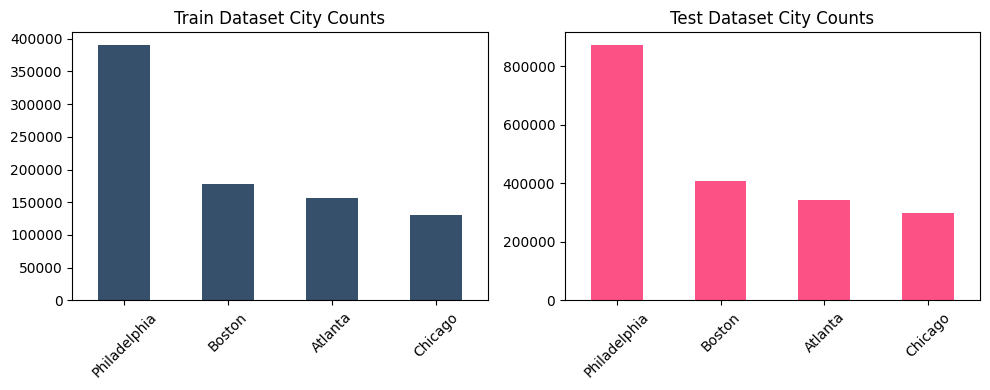

In [22]:
cities = [train["City"].value_counts(), test["City"].value_counts()]
titles = ["Train", "Test"]
colors = ["#364F6B", "#FC5185"]

f, axs = plt.subplots(1,2,figsize=(10,4))
for ax, city, title, color in zip(axs, cities, titles, colors): 
    city.plot(ax=ax, color=color, kind='bar')
    ax.set_title(f"{title} Dataset City Counts")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

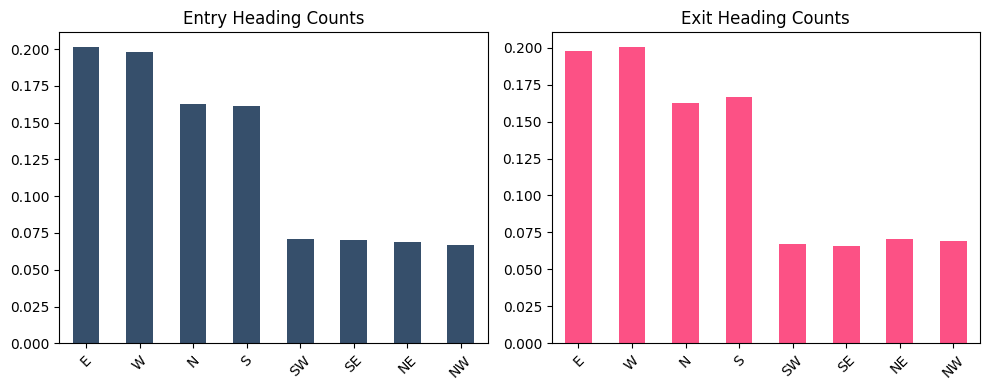

In [23]:
headings = [
    train["EntryHeading"].value_counts(normalize=True),
    train["ExitHeading"].value_counts(normalize=True).reindex(train["EntryHeading"].value_counts().index)
]
titles = ["Entry", "Exit"]
colors = ["#364F6B", "#FC5185"]

f, axs = plt.subplots(1,2,figsize=(10,4))
for ax, heading, title, color in zip(axs, headings, titles, colors): 
    heading.plot(ax=ax, color=color, kind='bar')
    ax.set_title(f"{title} Heading Counts")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Con el método `hist()` puede visualizar rápidamente la forma en la que está distribuida la data en las variables numéricas del dataframe.

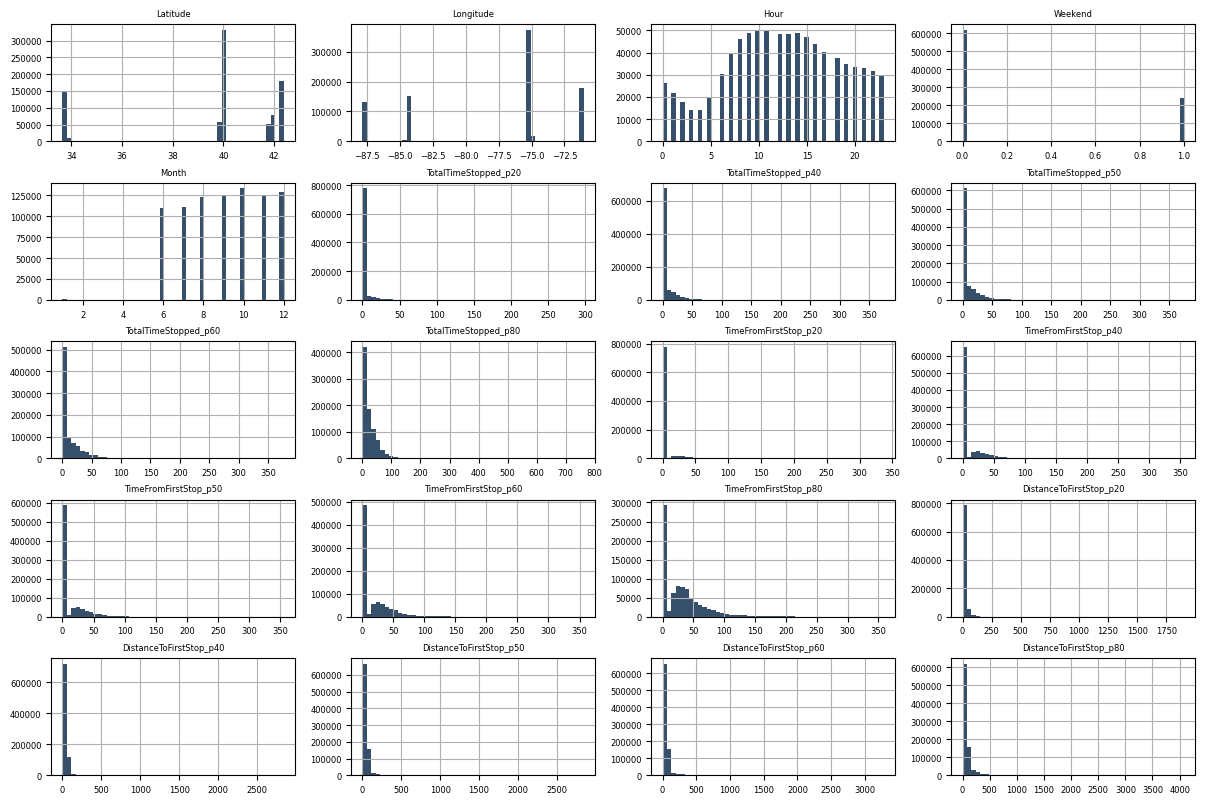

In [24]:
import matplotlib as mpl


with mpl.rc_context({
    'font.size': 5,
    'axes.labelsize': 6,
    'axes.titlesize': 6,
    'legend.fontsize': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
}):
    train.drop(["RowId", "IntersectionId"], axis=1).hist(bins=50, figsize=(12, 8), color="#364F6B")
    plt.tight_layout()
    plt.show()

También es buena idea realizar una selección de datos sobre una condición, e.g., tomar todos los registros pertenecientes a la ciudad de **Atlanta**. Hacer esta extracción, le permite un mejor entendimiento y sacar conclusiones de los posibles subconjuntos.

RowId  IntersectionId   Latitude  Longitude  \
0    1921357               0  33.791659 -84.430032   
1    1921358               0  33.791659 -84.430032   
2    1921359               0  33.791659 -84.430032   
3    1921360               0  33.791659 -84.430032   
4    1921361               0  33.791659 -84.430032   
..       ...             ...        ...        ...   
649  1922006               0  33.791659 -84.430032   
650  1922007               0  33.791659 -84.430032   
651  1922008               0  33.791659 -84.430032   
652  1922009               0  33.791659 -84.430032   
653  1922010               0  33.791659 -84.430032   

                  EntryStreetName                ExitStreetName EntryHeading  \
0    Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1    Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2    Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3    Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4    Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
..                            ...                           ...          ...   
649  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
650  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
651  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
652  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
653  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   

    ExitHeading  Hour  Weekend  ...  TimeFromFirstStop_p50  \
0            NW     0        0  ...                    0.0   
1            SE     0        0  ...                    0.0   
2            NW     1        0  ...                    0.0   
3            SE     1        0  ...                    0.0   
4            NW     2        0  ...                    0.0   
..          ...   ...      ...  ...                    ...   
649          SE    21        1  ...                    0.0   
650          NW    22        1  ...                    0.0   
651          SE    22        1  ...                    0.0   
652          NW    23        1  ...                    0.0   
653          SE    23        1  ...                    0.0   

    TimeFromFirstStop_p60  TimeFromFirstStop_p80  DistanceToFirstStop_p20  \
0                     0.0                    0.0                      0.0   
1                     0.0                    0.0                      0.0   
2                     0.0                    0.0                      0.0   
3                     0.0                    0.0                      0.0   
4                     0.0                    0.0                      0.0   
..                    ...                    ...                      ...   
649                   0.0                    0.0                      0.0   
650                   0.0                    0.0                      0.0   
651                   0.0                    0.0                      0.0   
652                   0.0                    0.0                      0.0   
653                   0.0                    0.0                      0.0   

     DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   
..                       ...                      ...   
649                      0.0                      0.0   
650                      0.0                      0.0   
651                      0.0                      0.0   
652                      0.0                      0.0   
653                      0.0                      0.0   

     DistanceToFirstStop_p60  DistanceToFi

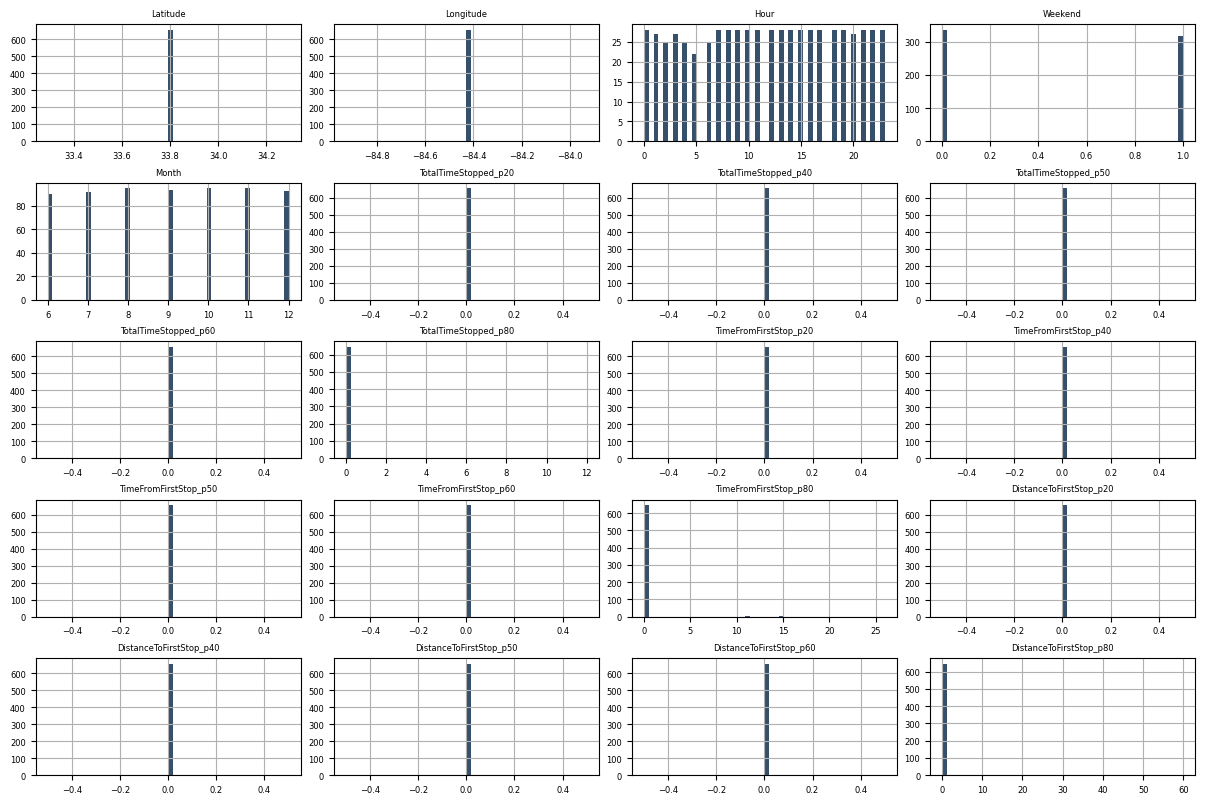

In [25]:
atlanta_0 = train[(train["IntersectionId"] == 0) & (train["City"] == 'Atlanta')]
display(atlanta_0)

with mpl.rc_context({
    'font.size': 5,
    'axes.labelsize': 6,
    'axes.titlesize': 6,
    'legend.fontsize': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
}):
    atlanta_0.drop(["RowId", "IntersectionId"], axis=1).hist(bins=50, figsize=(12, 8), color="#364F6B")
    plt.tight_layout()
    plt.show()

In [26]:
mean_, median_ = atlanta_0['TotalTimeStopped_p80'].mean(), atlanta_0['TotalTimeStopped_p80'].median()
count_, sum_ = atlanta_0.shape[0], atlanta_0['TotalTimeStopped_p80'].sum()

print(
    "[INFO] (City -> Atlanta), (IntersectionId -> 0), "
    f"(mean -> {mean_}), (count -> {count_}), (median -> {median_}), (sum -> {sum_})"
)

[INFO] (City -> Atlanta), (IntersectionId -> 0), (mean -> 0.12232415902140673), (count -> 654), (median -> 0.0), (sum -> 80.0)


Las anteriores operaciones (`mean()`, `count()`, `median()` y  `sum()`) puede ser extrapoladas a todo el dataset, utilizando el método `groupby()` y posteriormente llamando las operaciones con el método `aggregate()`. A continuación, vemos el ejemplo usando `groupby()` Y donde se evidencia que el ejemplo anterior para la intersección vial con ID 0 en la ciudad de Atlanta, se obtiene en la primera fila del `dataframe` resultante.

In [27]:
train.groupby(["IntersectionId",'City','Latitude','Longitude'])['TotalTimeStopped_p80'].aggregate(
    ["mean", "count", "median", "sum"]
).reset_index()

IntersectionId          City   Latitude  Longitude       mean  count  \
0                  0       Atlanta  33.791659 -84.430032   0.122324    654   
1                  0        Boston  42.291743 -71.077182  21.690000    100   
2                  0       Chicago  41.898429 -87.770378  11.400000      5   
3                  0  Philadelphia  39.970787 -75.154152  19.295844    409   
4                  1       Atlanta  33.750940 -84.393032  35.134986    363   
...              ...           ...        ...        ...        ...    ...   
4800            2868       Chicago  41.886807 -87.642802  23.200000      5   
4801            2869       Chicago  41.851913 -87.695455  45.852273     88   
4802            2873       Chicago  41.859905 -87.646703   5.470588     34   
4803            2874       Chicago  41.891492 -87.639861  26.725490     51   
4804            2875       Chicago  41.790911 -87.630408   1.637931     58   

      median      sum  
0        0.0     80.0  
1       21.5   2169.0  
2       10.0     57.0  
3       13.0   7892.0  
4       30.0  12754.0  
...      ...      ...  
4800    21.0    116.0  
4801    40.5   4035.0  
4802     0.0    186.0  
4803    28.0   1363.0  
4804     0.0     95.0  

[4805 rows x 8 columns]

La intuición también nos dice que el tráfico es completamente diferente entre semana y en fines de semana. Para realizar esto, necesitamos precisamente agrupar todos los registros que correspondan a días entre semana y en otro grupo, todos los registros de fines de semana. Para ello, agregaremos la información y posteriormente promediaremos la variable objetivo. A continuación podemos visualizar el valor promedio de las variables objetivo `TotalTimeStopped_p50` y `DistanceToFirstStop_p50` a lo largo de las 24 horas del día, para días entre semana y fines de semana.

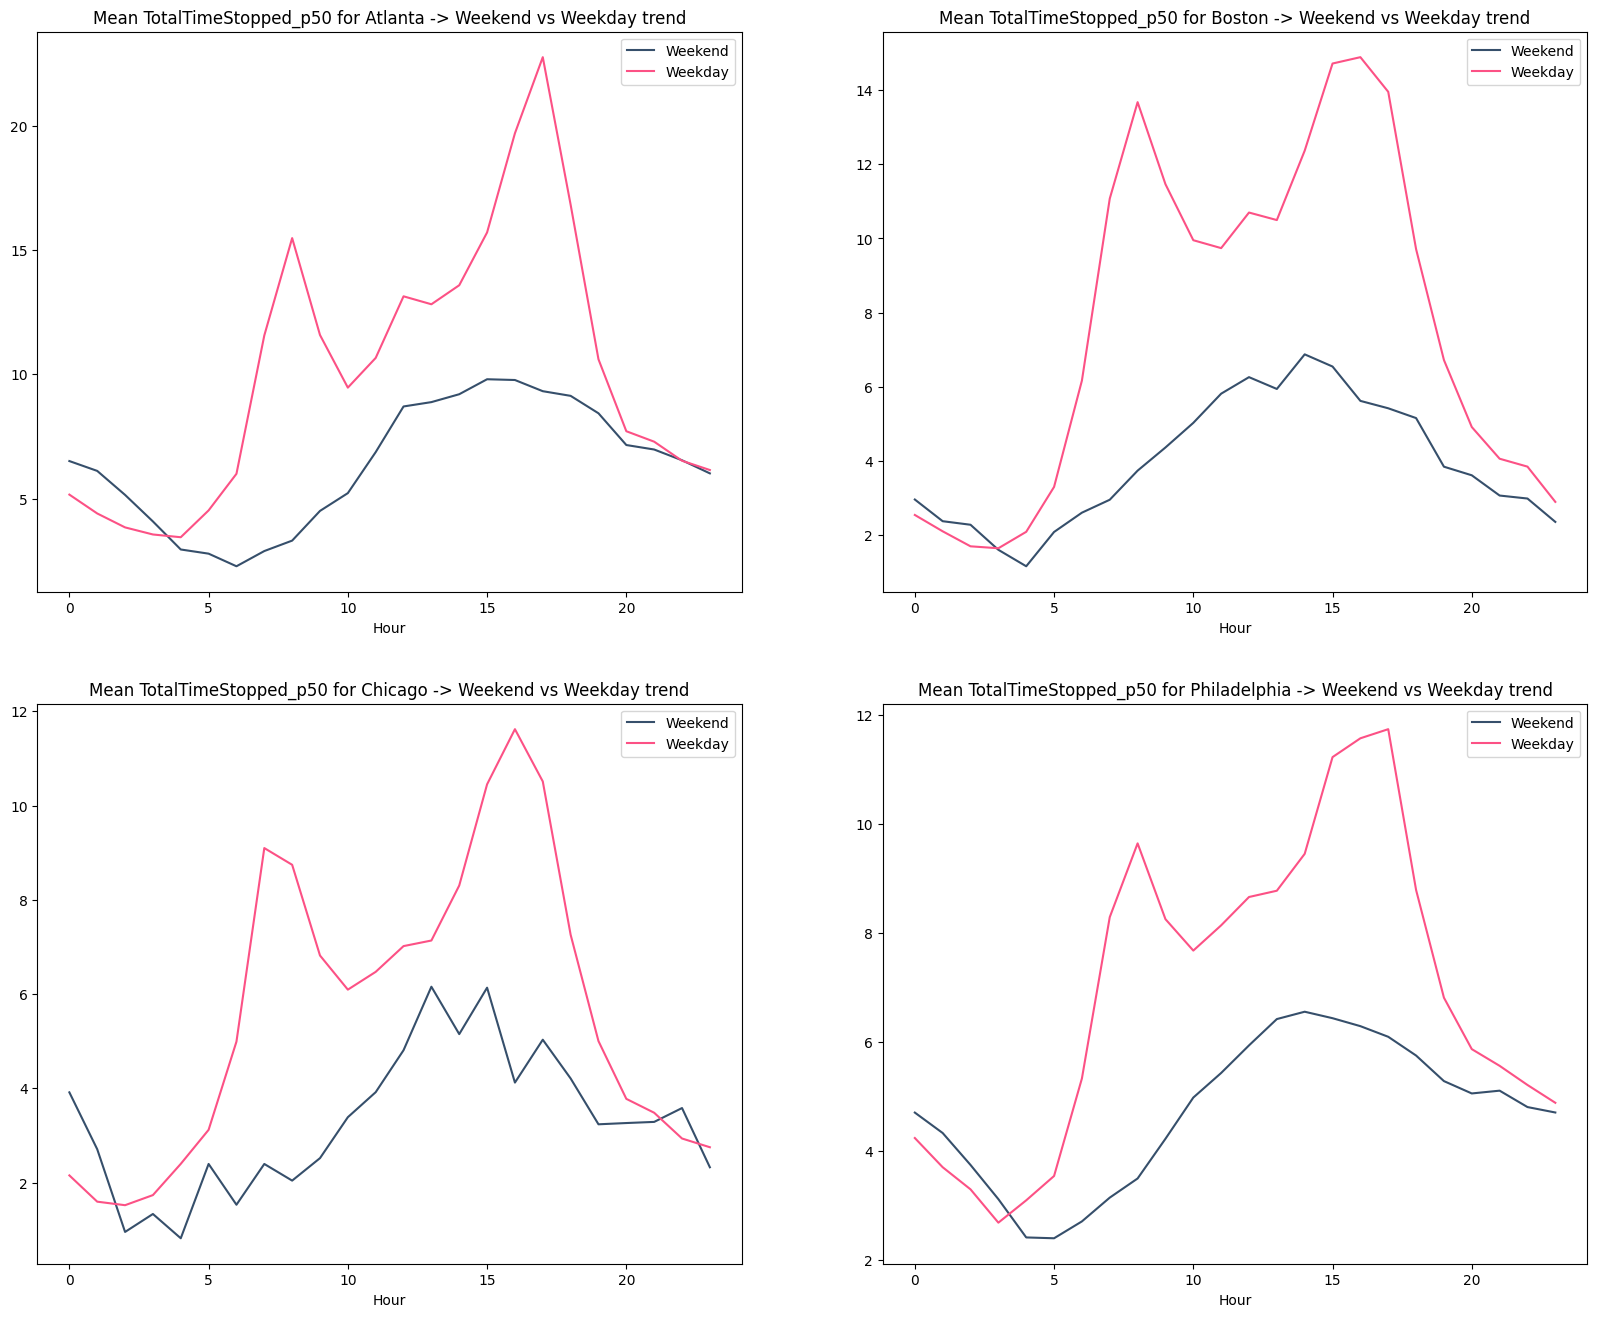

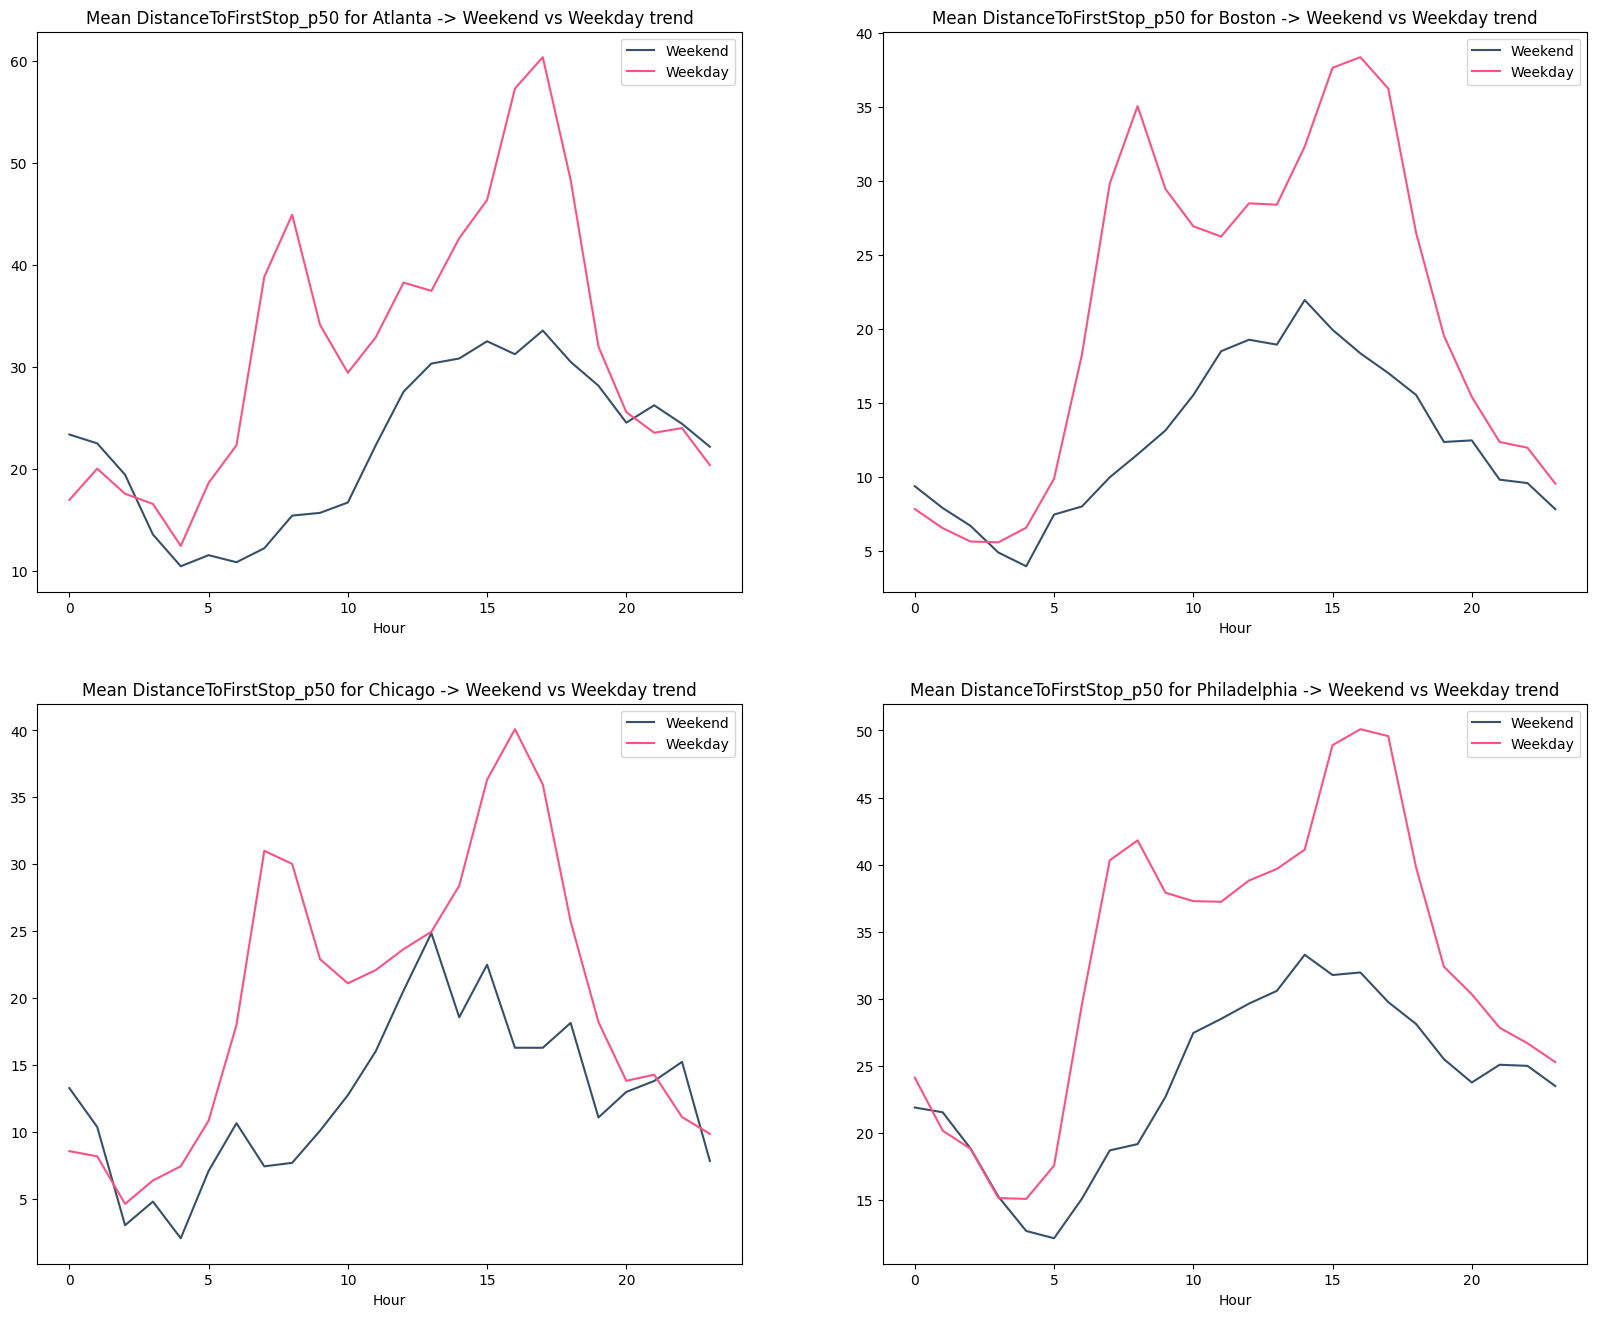

In [28]:
for target in ['TotalTimeStopped_p50', 'DistanceToFirstStop_p50']:
    cities = list(train["City"].unique())
    fig, axes = plt.subplots(nrows=2, ncols=2)
    axes = axes.ravel()
    for ax, city in zip(axes, cities):
        tmp = train.query(f'City == @city')
        hr_tmp = pd.DataFrame(index=tmp['Hour'].unique())
        hr_tmp['Weekend'] = tmp[tmp['Weekend']==1].groupby(['Hour'])[target].mean()
        hr_tmp['Weekday'] = tmp[tmp['Weekend']==0].groupby(['Hour'])[target].mean()
        hr_tmp = hr_tmp.sort_index()
        ax.set_xlabel("Hour")
        hr_tmp.plot(
            ax=ax,
            title=f"Mean {target} for {city} -> Weekend vs Weekday trend",
            figsize=(20,16),
            color=["#364F6B", "#FC5185"]
    )

Ahora, vimos que entre las principales características de los *datasets*, se encuentran las columnas de latitud y longitud. Estas variables georeferencian las intersecciones viales que se caracterizan en la información. Por consiguiente, es posible efectuar un análisis geoespacial de las características y de los *targets* del dataset.

# Seaborn

**Buscando correlaciones**

La correlación es una técnica estadística que determina que tanto cambia una variable en relación con otra variable y la dirección de esa relación. Estos coeficientes reflejan la tendencia de las variables a “covariar”; es decir, que los cambios en el valor de una variable se asocien con los cambios en el valor de la otra. Al interpretar los coeficientes de correlación, dos propiedades son importantes:

- **Magnitud**: Las correlaciones varían en magnitud de -1.0 a 1.0. Cuanto mayor sea el valor absoluto del coeficiente (el tamaño del número sin tener en cuenta el signo), mayor será la magnitud de la relación. Por ejemplo, las correlaciones de 0.60 y -0.60 son de igual magnitud y ambas son mayores que una correlación de 0,30. Cuando no exista una relación lineal, la correlación será 0.0; cuando existe una relación lineal perfecta (correspondencia uno a uno entre los valores de las variables), la correlación será 1.0 o -1.0.

- **Dirección**: La dirección de la relación (positiva o negativa) se indica mediante el signo del coeficiente. Una correlación positiva implica que los aumentos en el valor de una puntuación tienden a ir acompañados de aumentos en la otra. Una correlación negativa implica que los aumentos en una variable van acompañados de disminuciones en la otra.

Aunque en la practica no hay una razón sólida para mantener o eliminar características que tienen una baja correlación con la variable objetivo, si en el escenario de modelado es importante reducir la cantidad de predictores, puede utilizarse la correlacion como criterio de seleccion de caracteristicas. Si la cantidad de características es un problema, entonces tiene sentido mantener solo las caracteristicas más informativas, y la alta correlación es un indicador de "informatividad". Ahora bien, las características que están altamente correlacionadas entre sí (es decir, entre características, no con la variable objetivo), generalmente deben eliminarse porque son redundantes y algunos algoritmos no las manejan muy bien.

Los tres principales coeficientes de correlacion que veremos acontinuacion, corresponden al coeficiente de correlación de Pearson ($r$)¹³, el coeficiente de correlacion de rango de Kendall ($\tau$)¹⁴ y el coeficiente de correlacion de Spearman ($\rho$)¹⁵.


**Coeficiente de correlación de Pearson**

El coeficiente de correlación de Pearson va de –1 a 1. Cuando está cerca de 1, significa que hay una fuerte correlación positiva. Cuando el coeficiente es cercano a –1, significa que existe una fuerte correlación negativa o correlacion inversa. Finalmente, los coeficientes cercanos a 0 significan que no existe una correlación lineal. La Fig. 3 muestra varias distirbuciones de datos junto con el coeficiente de correlación entre sus ejes horizontal y vertical.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png" alt="standard-correlation">
  </a><br><br>
  <b>Figura 3:</b> <i>Varios conjuntos de puntos (x, y), con el coeficiente de correlación de x e y para cada conjunto. La correlación refleja la fuerza y la dirección de una relación lineal (fila superior), pero no la pendiente de esa relación (centro), ni muchos aspectos de las relaciones no lineales (parte inferior). N.B.: la figura del centro tiene pendiente 0 pero en ese caso el coeficiente de correlación no está definido porque la varianza de Y es cero</i>¹⁶.
</p><br>

---

¹² <a href="https://www.phdata.io/blog/data-science-stats-review/">Data Science Stats Review: Pearson’s, Kendall’s, and Spearman’s Correlation for Feature Selection</a>.

¹³ <a href="https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson">Coeficiente de correlación de Pearson</a>.

¹⁴ <a href="https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_rango_de_Kendall">Coeficiente de correlación de rango de Kendall</a>.

¹⁵ <a href="https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Spearman">Coeficiente de correlación de Spearman</a>.


¹⁶ <a href="https://en.wikipedia.org/wiki/Cardinality_(SQL_statements)">Cardinality (SQL statements)</a>.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_corr(data: pd.DataFrame, title: str, method: str = "pearson", annot: bool = True):
    f,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data.corr(method=method),
        vmin=-1,
        vmax=1,
        annot=annot,
        linewidths=.5,
        fmt='.2f',
        ax=ax
    )
    plt.title(f"{method.title()}'s Correlation Coefficient between {title}")
    return ax

Mientras que Pearson mide una relación lineal entre dos variables, Kendall y Spearman, miden la relación monótona. Si bien las relaciones lineales significan que dos variables se mueven juntas a una velocidad constante, piense en una línea recta, las relaciones monótonas miden la probabilidad de que dos variables se muevan en la misma dirección, pero no necesariamente a una velocidad constante.  El coeficiente correlación de Kendall propone entonces que la medida es el resultado de restar el total de pares discordantes del total de pares concordantes y dividirlo entre el total de pares posibles en el conjunto de datos. Por consiguiente, Kendall se enfoca en determinar la dirección de la covarianza de las variables analizadas, analizando la concordancia y discordancia de los pares, como se muestra en en la Fig. 4.

Al igual que la correlación de Pearson, el coeficiente de correlación de Kendall devolverá un valor entre -1 y 1, siendo -1 una relación monótona decreciente ( o negativa, i.e., las variables están inversamente relacionadas), 1 una relación monótona creciente (o positiva) y 0 representando ninguna correlación.


<p align="center">
  <a target="_blank">
    <img width="500px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Concordant_Points_Kendall_Correlation.svg/1024px-Concordant_Points_Kendall_Correlation.svg.png" alt="standard-correlation">
  </a><br><br>
  <b>Figura 4:</b> <i>Todos los puntos del área gris son concordantes y todos los puntos del área blanca son discordantes con respecto al punto (X_1,Y_1).</i>¹⁷.
</p><br>

La de Spearman es muy similar a la de Kendall. Es una prueba no paramétrica que mide una relación monótona utilizando datos clasificados¹⁸.<br><br>

<div class="tip">
<b>Tip:</b> Si bien a menudo se puede usar indistintamente entre Spearman y Kendall. No obstante, el coeficiente de correlación de rango de Kendall es más robusto y, en general, el método preferido entre los dos.
</div><br>

Procedemos entonces a calcular el coeficiente de correlación de Pearson ($r$), Kendall ($\tau$) y Spearman ($\rho$), a través de de un mapa de calor de la matriz de correlación¹⁹:

---

¹⁷ <a href="https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_rango_de_Kendall">Coeficiente de correlación de rango de Kendall</a>.

¹⁸ <a href="https://www.phdata.io/blog/data-science-stats-review/">Data Science Stats Review: Pearson’s, Kendall’s, and Spearman’s Correlation for Feature Selection</a>.

¹⁹ <a href="https://es.wikipedia.org/wiki/Matriz_de_correlaci%C3%B3n">Matriz de correlación</a>.

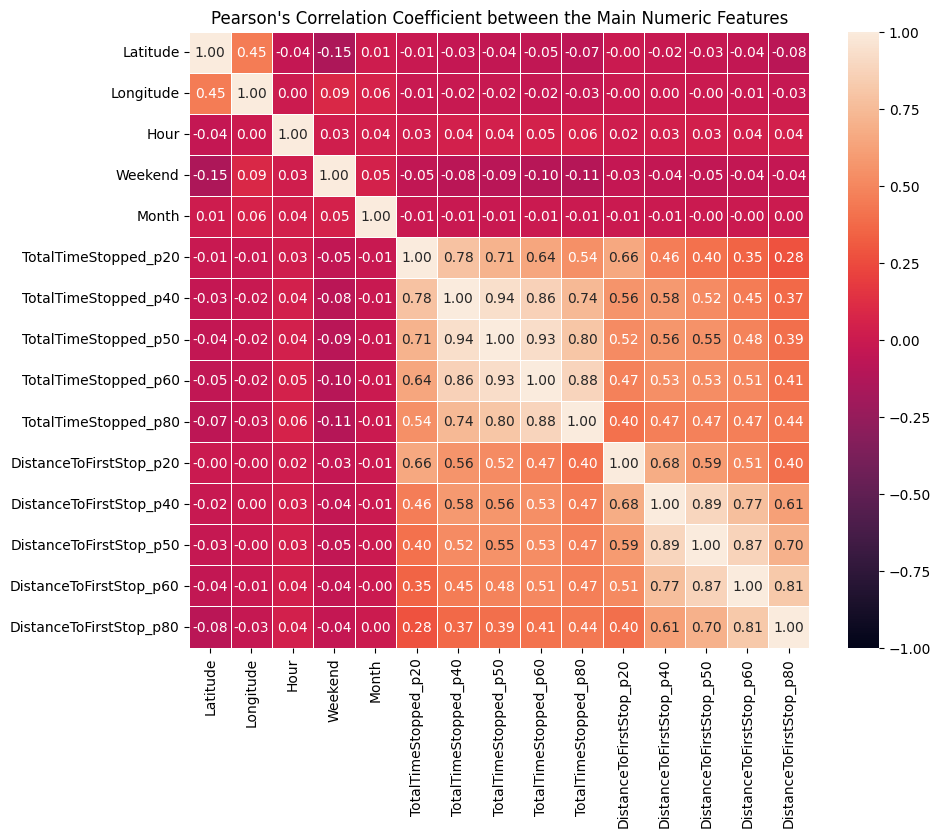

/Users/joefaver/anaconda3/envs/pbs/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


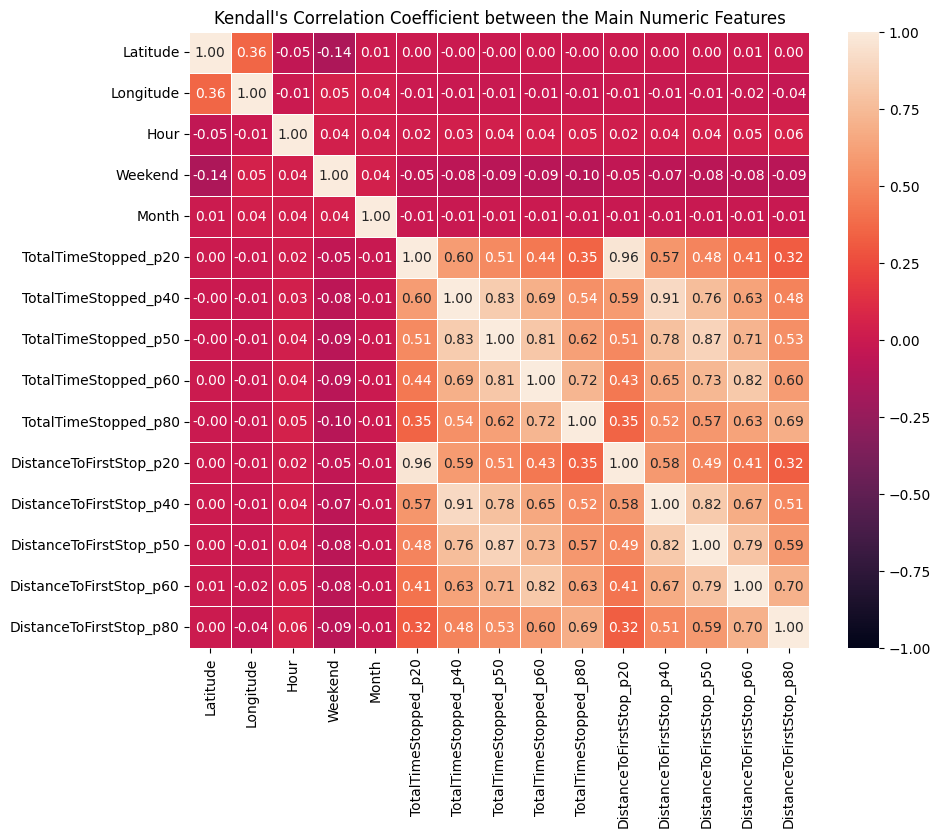

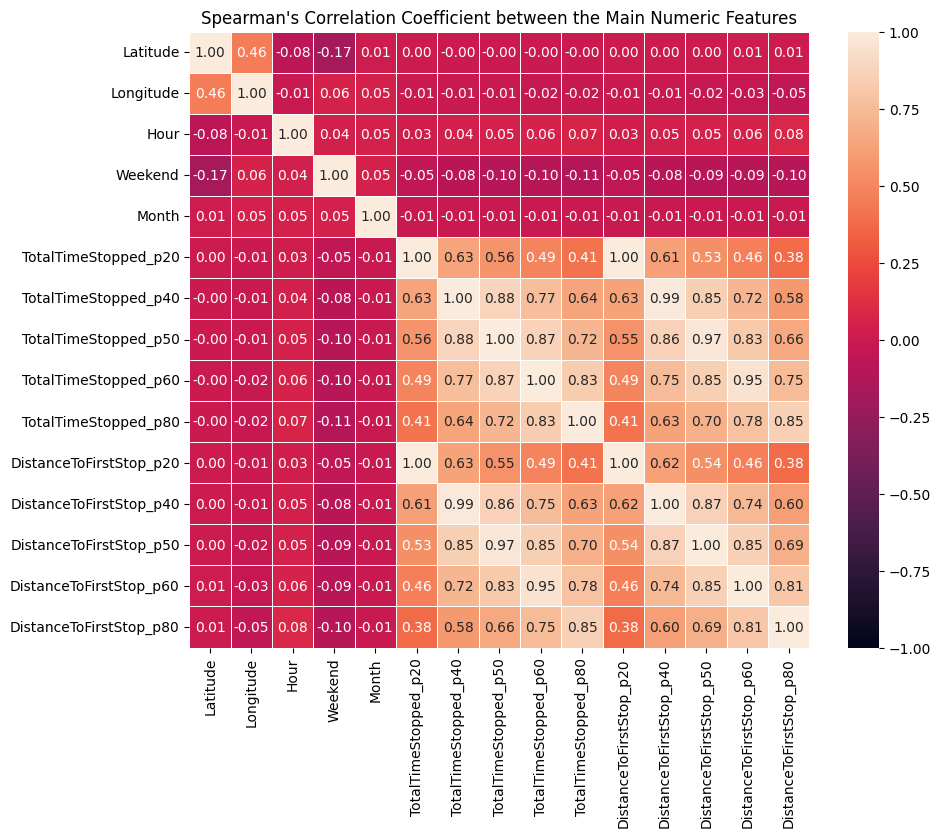

In [30]:
for method in ["pearson", "kendall", "spearman"]:
    ax = plot_corr(
        train[["Latitude", "Longitude", "Hour", "Weekend", "Month",] + time_targets + distance_targets],
        title="the Main Numeric Features",
        method=method
    )
    plt.show()

In [31]:
import numpy as np

target = "TotalTimeStopped_p50"
zero_counts = train[target].where(
    train[target] == 0, 1
).value_counts(normalize=True)
zero_counts.update(np.round(zero_counts.values * 100, 2))
print(f"[INFO] Zero counts for \"{target}\":\n", zero_counts)

target = "TotalTimeStopped_p20"
zero_counts = train[target].where(
    train[target] == 0, 1
).value_counts(normalize=True)
zero_counts.update(np.round(zero_counts.values * 100, 2))
print(f"\n[INFO] Zero counts for \"{target}\":\n", zero_counts)

targets = ["TotalTimeStopped_p20", "TotalTimeStopped_p50"]
zero_counts = train[targets].where(
    (train[targets[0]] == 0) & (train[targets[1]] == 0), 1,
).value_counts(normalize=True)
zero_counts.update(np.round(zero_counts.values * 100, 2))
print(f"\n[INFO] Zero counts for `{targets[0]} == 0.0` and `{targets[1]} == 0.0`:\n", zero_counts)

[INFO] Zero counts for "TotalTimeStopped_p50":
 0.0    68.4
1.0    31.6
Name: TotalTimeStopped_p50, dtype: float64

[INFO] Zero counts for "TotalTimeStopped_p20":
 0.0    90.79
1.0     9.21
Name: TotalTimeStopped_p20, dtype: float64

[INFO] Zero counts for `TotalTimeStopped_p20 == 0.0` and `TotalTimeStopped_p50 == 0.0`:
 TotalTimeStopped_p20  TotalTimeStopped_p50
0.0                   0.0                     0.683977
1.0                   1.0                     0.316023
dtype: float64


In [32]:
import scipy


r, p_r = scipy.stats.pearsonr(
    train["TotalTimeStopped_p20"].tolist(), train["TotalTimeStopped_p50"].tolist()
)
tau, p_tau = scipy.stats.kendalltau(
    train["TotalTimeStopped_p20"].tolist(), train["TotalTimeStopped_p50"].tolist()
)
rho, p_rho = scipy.stats.spearmanr(
    train["TotalTimeStopped_p20"].tolist(), train["TotalTimeStopped_p50"].tolist()
)
print(f"[INFO] Pearson -> {(r, p_r)}, Kendall -> {(tau, p_tau)}, Spearman -> {(rho, p_rho)}")

[INFO] Pearson -> (0.7086292117751216, 0.0), Kendall -> (0.5133966905200052, 0.0), Spearman -> (0.5563563262802208, 0.0)


/Users/joefaver/anaconda3/envs/pbs/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Algunas de las observaciones más relevantes son:

- En los tres casos, la latitud y la longitud tienen una baja correlación con las variables objetivo.
- En cuanto a las demás posibles características, estas no están correlacionadas con ninguna otra variable del conjunto de entrenamiento.
- Por otro lado, las variables objetivo tienen una correlación positiva entre sí. Por ejemplo, **TotalTimeStopped_p20** tiene una coeficiente de correlación de Pearson de 0,71 con **TotalTimeStopped_p50**. ***Esto se debe principalmente a que cuando `p50` es 0, `p20` también es 0 (68% de las observaciones son $p50 = 0$).²⁰***
- Verificando la correlación de Kendall para **TotalTimeStopped_p20** y **TotalTimeStopped_p50**, vemos que el valor es de 0.51 y de 0.56 para el coeficiente de correlación de Spearman, siendo ambos inferiores al 0.71 de la correlación de Pearson. Es en casos como este, donde Kendall y Spearman ofrecen una estimación robusta de la correlación, pues al ser no paramétricos, no requieren que las dos variables caigan en una curva de campana (distribución normal o de Gauss). Por lo tanto, deberíamos preferir el coeficiente de correlación de rango de Kendall cuando los datos no cumplen con alguno de los requisitos de la correlación de Pearson.
- En el caso contrario, como en la relación entre las variables **TotalTimeStopped_p20** y **DistanceToFirstStop_p20**, la correlación de Pearson es de 0.66, mientras que la correlación de Kendall es de 0.96. Esto nos sugiere que a pesar de que los pares tienen la misma dirección en la relación de concordancia, lo hacen con magnitudes diferentes.

A pesar que las distintas matrices de correlación nos ofrecen una valiosa información de las relaciones entre las variables, es aconsejable acompañar el análisis de correlaciones con los gráficos de dispersión entre las variables. A continuación, graficamos el equivalente de la matriz de correlación de Kendall, incluyendo los gráficos de dispersión en la parte triangular inferior:

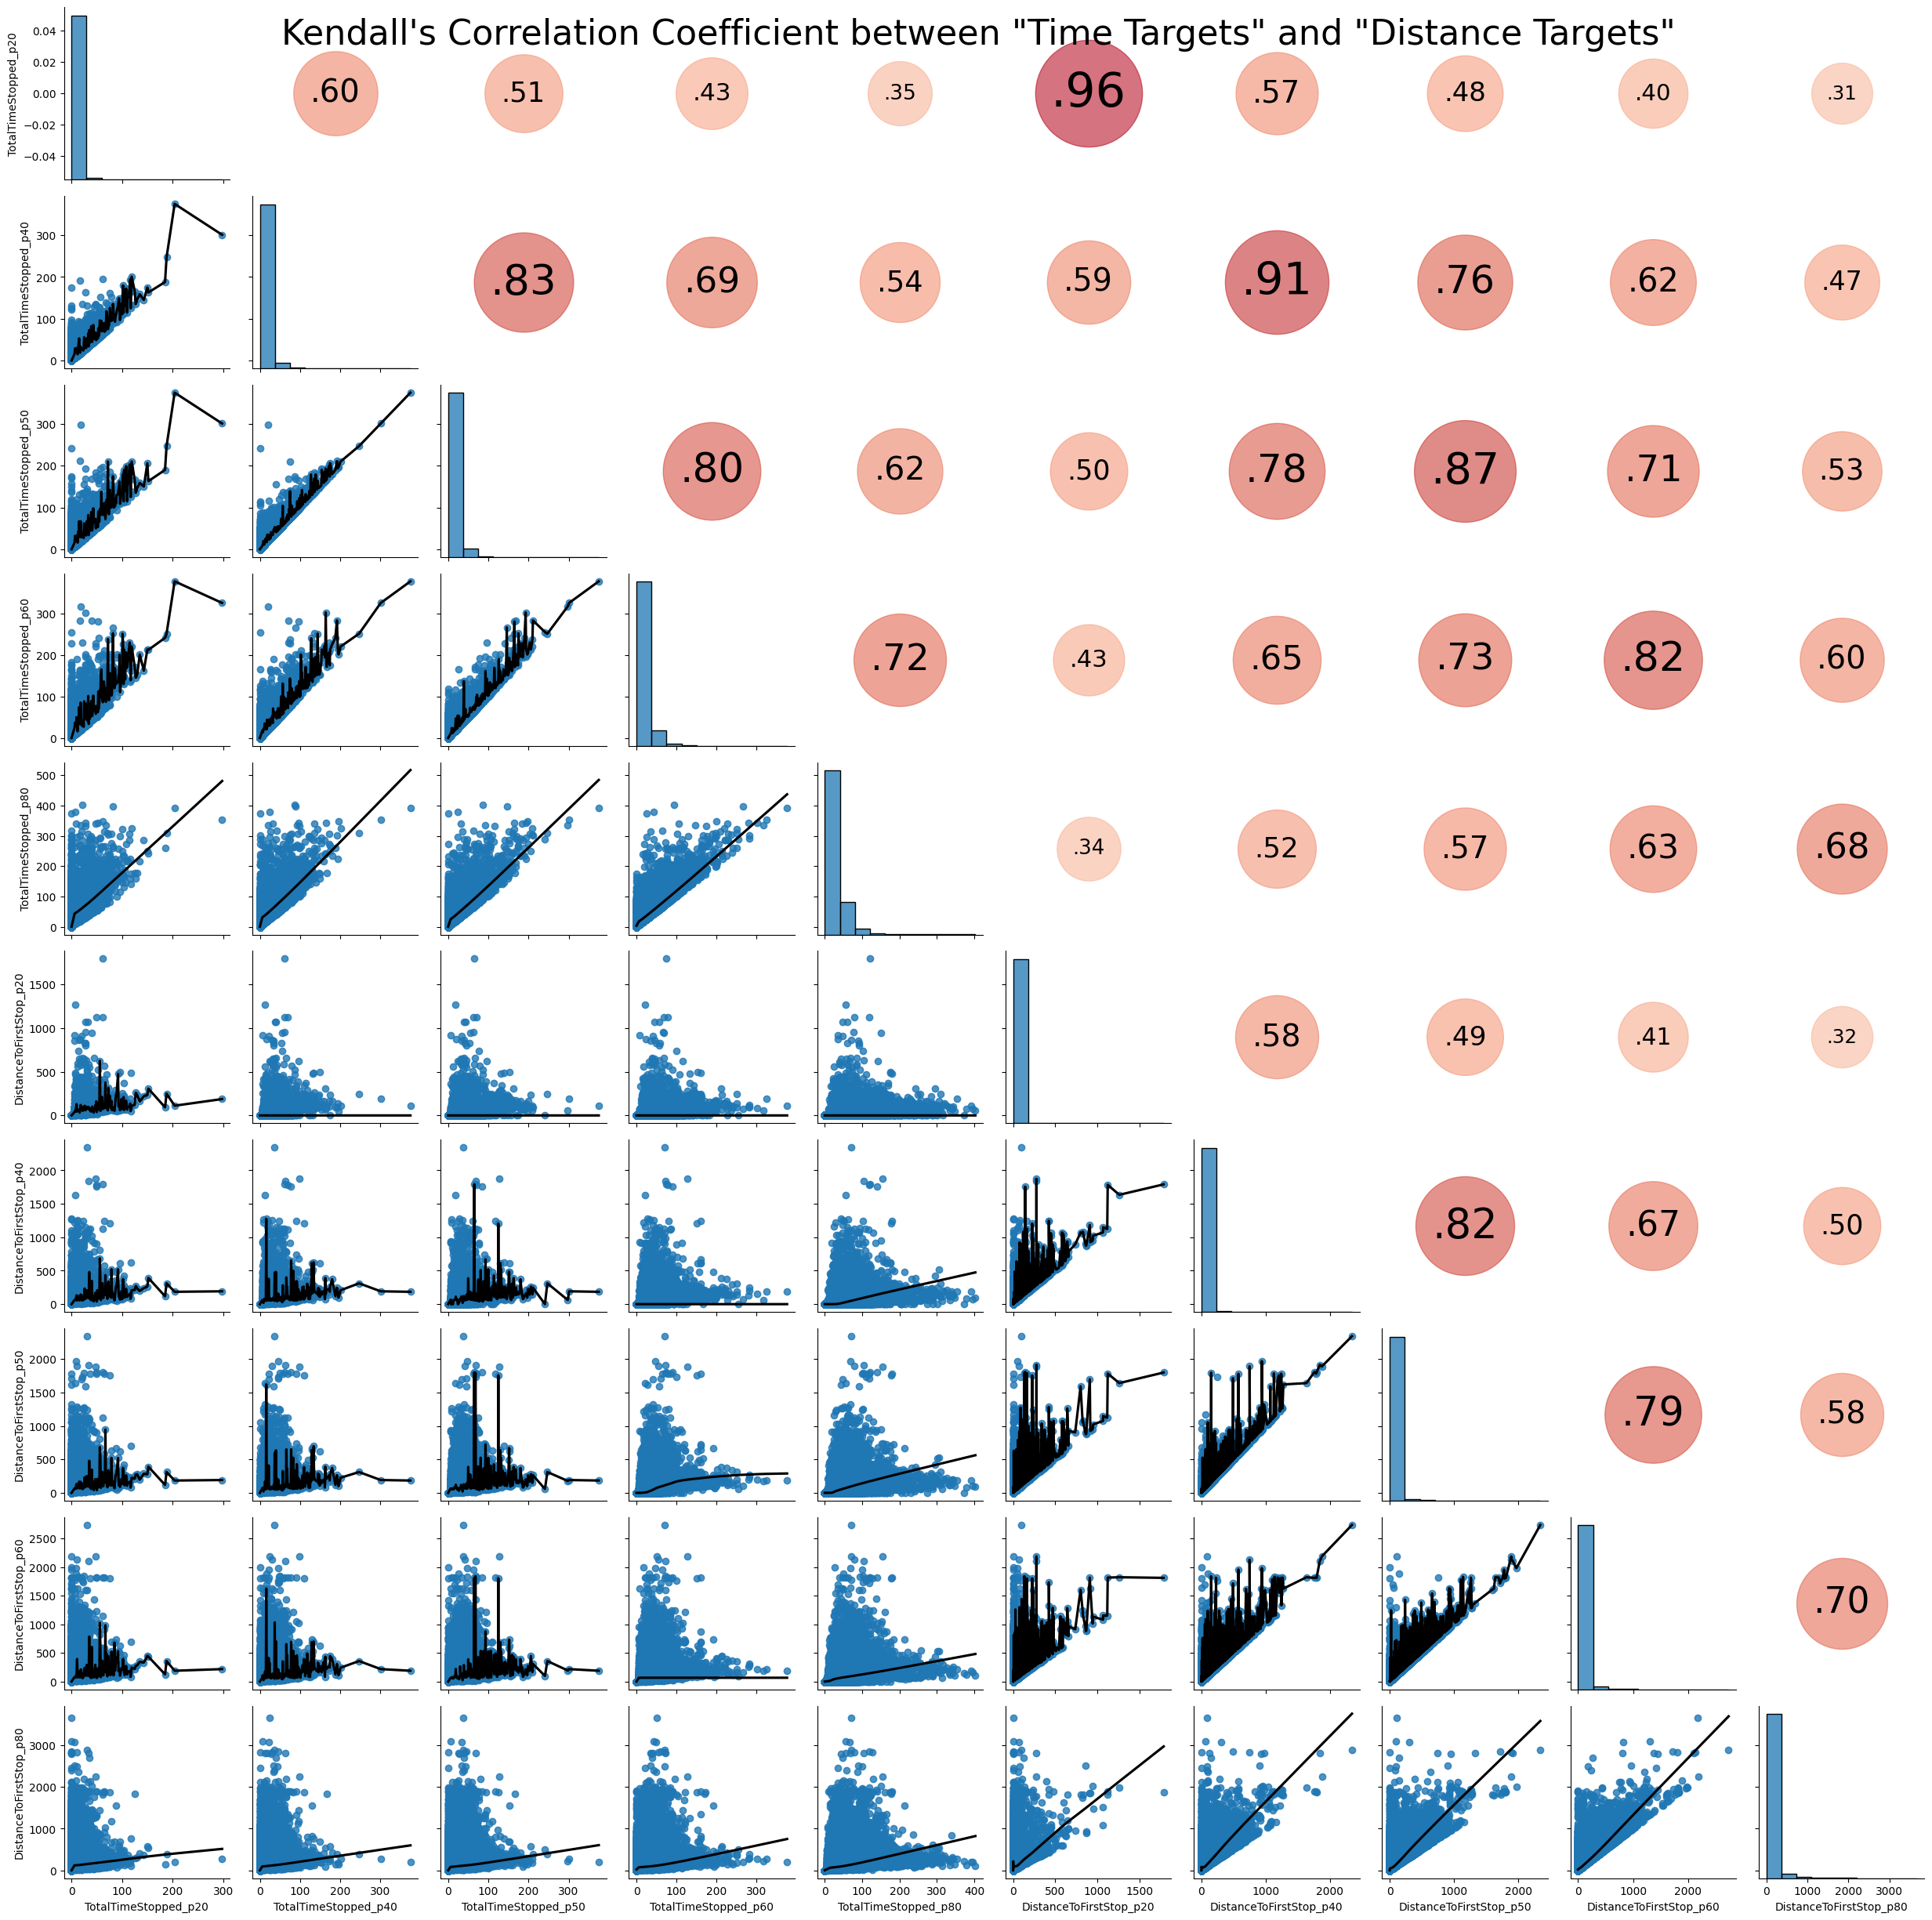

In [33]:
N_SAMPLES = int(train.shape[0] * 0.1)


def corr_upper_triangular_dot(*args, **kwargs):
    corr_tau = args[0].corr(args[1], method=method)
    corr_text = f"{corr_tau:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_tau) * 10000
    ax.scatter(
        [.5],
        [.5],
        marker_size,
        [corr_tau],
        alpha=0.6,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        transform=ax.transAxes
    )
    font_size = abs(corr_tau) * 40 + 5
    ax.annotate(
        corr_text, [.5, .5,], 
        xycoords="axes fraction",
        ha='center',
        va='center',
        fontsize=font_size
    )
    return ax


np.seterr(invalid='ignore', over='ignore')

method = "kendall"
g = sns.PairGrid(train[time_targets + distance_targets].sample(N_SAMPLES), aspect=1.0, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=None, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde=False, bins=10)
g.map_upper(corr_upper_triangular_dot, method=method)
g.fig.suptitle(
    f"{method.title()}'s Correlation Coefficient between \"Time Targets\" and \"Distance Targets\"",
    fontsize=32
)
plt.show()

In [34]:
def plot_scatter_and_corr(
    dataframe: pd.DataFrame,
    x_feature: str,
    y_feature:str,
    ax: np.array = None,
    pos: int = None
) -> np.array:
    if ax is None:
        f, ax = plt.subplots(1, 2, figsize=(10,4))

    pos = 0 if pos is None else 1

    r, _ = scipy.stats.pearsonr(
        dataframe[x_feature].tolist(), dataframe[y_feature].tolist()
    )
    tau, _ = scipy.stats.kendalltau(
        dataframe[x_feature].tolist(), dataframe[y_feature].tolist()
    )
    ax[pos].scatter(
        dataframe[x_feature].tolist(),
        dataframe[y_feature].tolist(),
        alpha=0.2,
        color="#FC5185" if pos == 1 else "#364F6B",
        label=f"r={np.round(r, 2)}, tau={np.round(tau, 2)}"
    )
    ax[pos].set_xlabel(x_feature)
    ax[pos].set_ylabel(y_feature)
    ax[pos].set_title(f"{y_feature} vs. {x_feature}")
    ax[pos].tick_params(axis='x', rotation=45)
    ax[pos].legend()

    plt.tight_layout()

    return ax

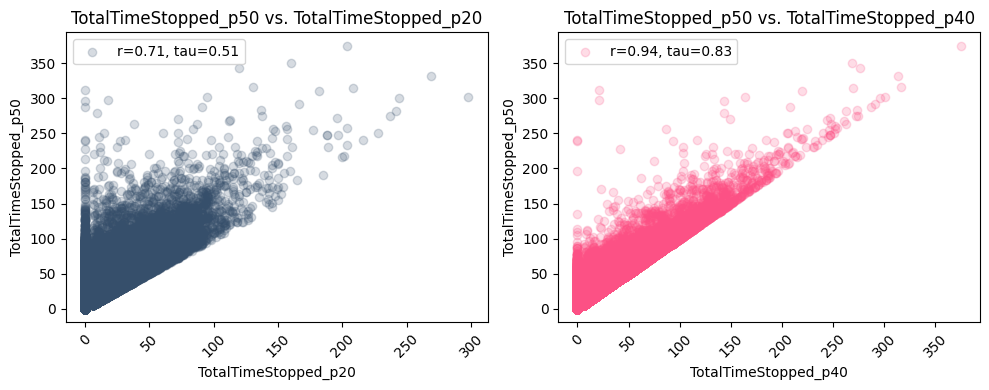

In [35]:
x_feature, y_feature = "TotalTimeStopped_p20", "TotalTimeStopped_p50"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature,
)

x_feature, y_feature = "TotalTimeStopped_p40", "TotalTimeStopped_p50"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature, ax=ax, pos=1
)

plt.show()

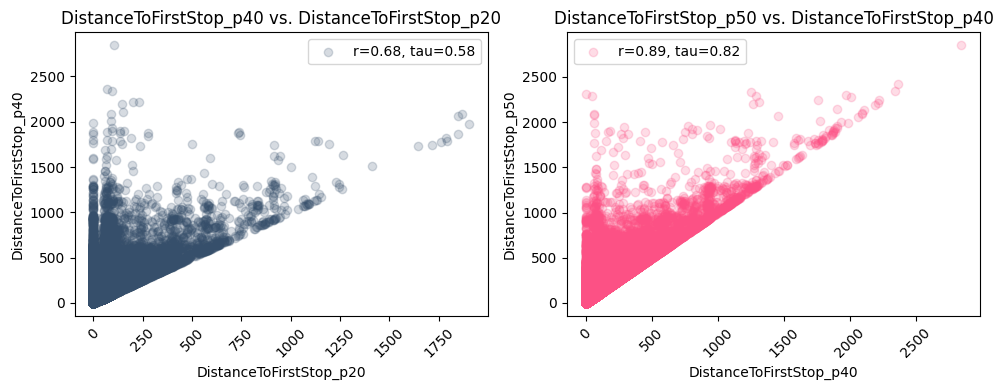

In [36]:
x_feature, y_feature = "DistanceToFirstStop_p20", "DistanceToFirstStop_p40"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature,
)

x_feature, y_feature = "DistanceToFirstStop_p40", "DistanceToFirstStop_p50"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature, ax=ax, pos=1
)

plt.show()

El fenómeno en el que el coeficiente de correlación de Pearson es mayor que el coeficiente de correlación de Kendall, sugiere fuertemente algún tipo de agrupación en los datos donde la relación entre dos variables cambia dependiendo del nivel en el que los consideramos.

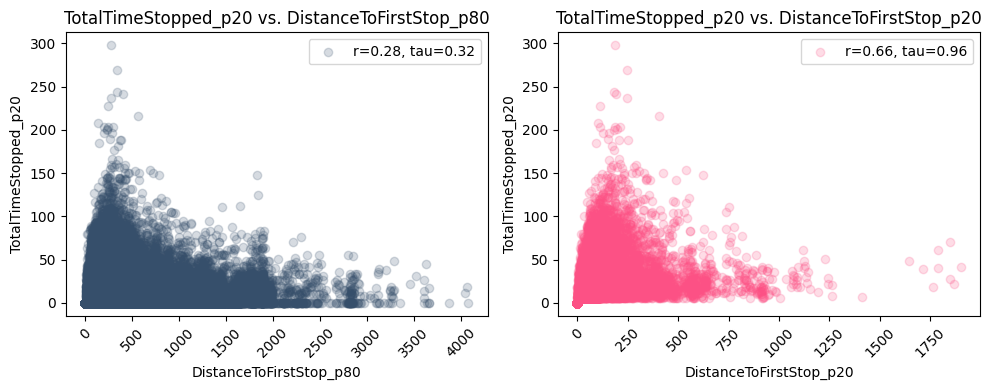

In [37]:
x_feature, y_feature = "DistanceToFirstStop_p80", "TotalTimeStopped_p20"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature,
)

x_feature, y_feature = "DistanceToFirstStop_p20", "TotalTimeStopped_p20"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature, ax=ax, pos=1
)

plt.show()

La diferencia clave en los cálculos de la correlación $r$ de Pearson frente a la correlación $\tau$ de Kendall, es que Pearson tiene en cuenta tanto la magnitud como la dirección, mientras que $\tau$ solo considera la dirección. En términos generales, al calcular $r$, los pares de puntos entre grupos contribuyen mucho más a una correlación positiva que los pares de puntos dentro de un grupo contribuyen a una correlación negativa. Pero al calcular la $\tau$ de Kendall, el efecto positivo de un par de puntos entre grupos se compensa exactamente con el efecto negativo de un par de puntos dentro de un grupo.

**Ponga su experticia combinando atributos**

Aunque la combinación de atributos puede realizarse bajo conceptos elaborados a partir de aparatos matemáticos, tales como, la distancia entre raíces cuadráticas, razón de potencia o diferencias racionales. También es posible combinar atributos según leyes físicas, como puede ser la velocidad promedio o la aceleración. Acá presentamos un ejemplo básico y práctico sobre variables categóricas, pero que consolida la idea principal de la combinación de atributos. 

In [29]:
train["city_intersec_id"] = train["City"] + pd.Series(["_"] * len(train)) + \
    train["IntersectionId"].astype("string")
test["city_intersec_id"] = test["City"] + pd.Series(["_"] * len(test)) + \
    test["IntersectionId"].astype("string")
counts = train['city_intersec_id'].value_counts()
print(f"[INFO] Number of unique intersections: {len(train['city_intersec_id'].unique())}")
counts = train['city_intersec_id'].value_counts()
print("\n[INFO] Intersection Counts for Train Dataset:\n", counts)
print(f"[INFO] Verified: {counts.sum() == train.shape[0]}")

[INFO] Number of unique intersections: 4805

[INFO] Intersection Counts for Train Dataset:
 Atlanta_84          2437
Atlanta_112         2364
Atlanta_158         2206
Atlanta_331         2124
Philadelphia_889    2065
                    ... 
Chicago_1447           1
Chicago_309            1
Philadelphia_572       1
Chicago_1100           1
Chicago_1733           1
Name: city_intersec_id, Length: 4805, dtype: Int64
[INFO] Verified: True


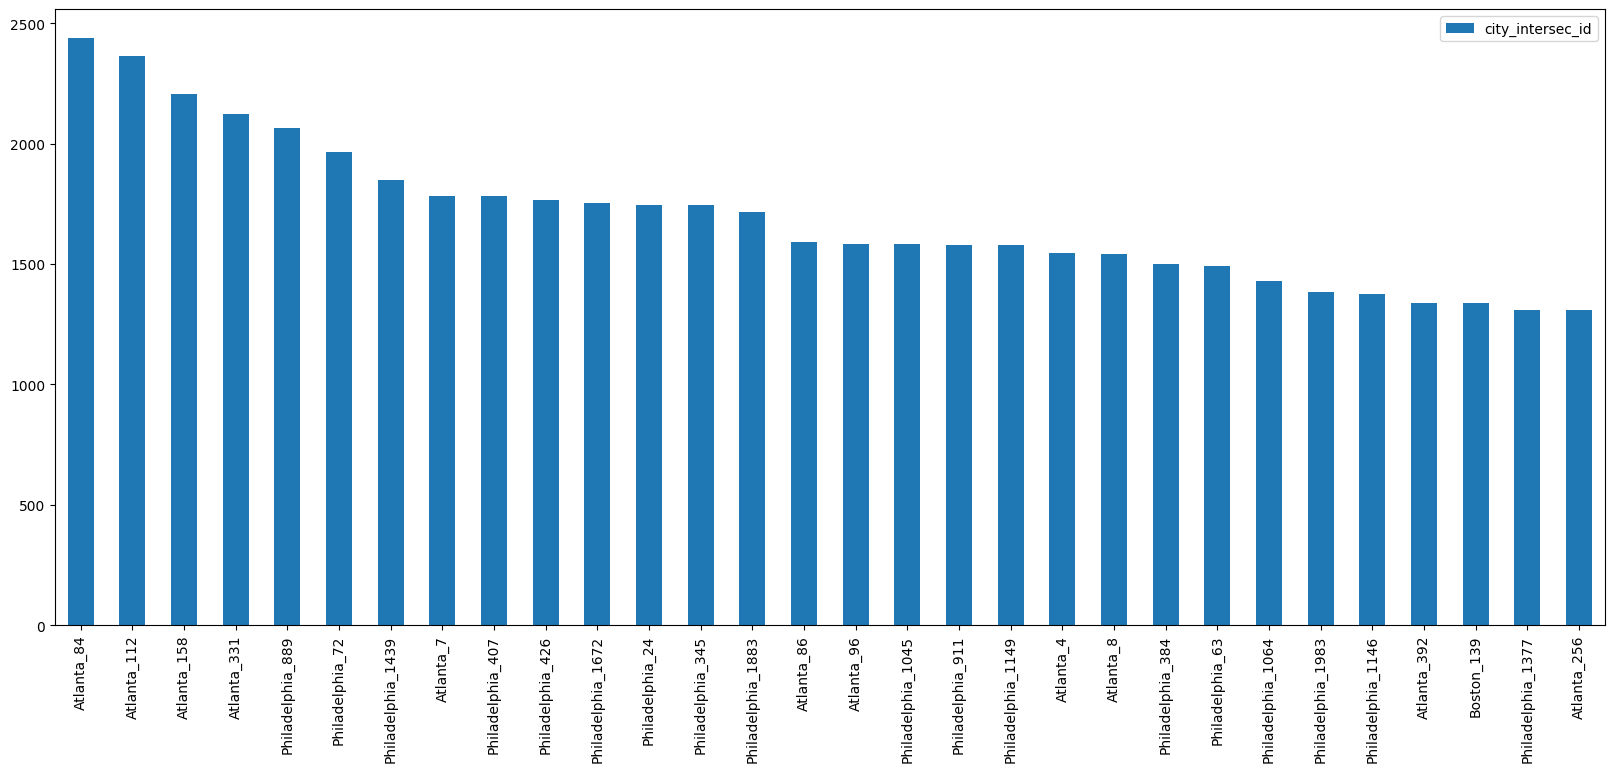

In [30]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1, figsize=(20, 8))
tmp = pd.DataFrame(counts.iloc[0:30])
tmp.plot(ax=ax, kind="bar")
plt.show()

Este identificador único nos permite realizar operaciones entre conjuntos para la validación de suposiciones en cuanto a los conjuntos de entrenamiento y de *test*.

In [31]:
train_intersection_ids = set(train["city_intersec_id"].value_counts().index)
print("[INFO] Number of unique intersections in training dataset: ", len(train_intersection_ids))
test_intersection_ids = set(test["city_intersec_id"].value_counts().index)
print("[INFO] Number of unique intersections in testing dataset: ", len(test_intersection_ids))
print("[INFO] Number of commun intersections: ",
    len(set.intersection(
        train_intersection_ids,
        test_intersection_ids
    ))
)
test_inter_minus_train_inter = test_intersection_ids - train_intersection_ids
print(
    "[INFO] Number of intersections that are in the "
    "testing set but not in the training set: ",
    len(test_inter_minus_train_inter)
)
train_inter_minus_test_inter = train_intersection_ids - test_intersection_ids
print(
    "[INFO] Number of intersections that are in the training"
    "set but not in the testing set: ",
    len(train_inter_minus_test_inter)
)

[INFO] Number of unique intersections in training dataset:  4805
[INFO] Number of unique intersections in testing dataset:  5942
[INFO] Number of commun intersections:  4366
[INFO] Number of intersections that are in the testing set but not in the training set:  1576
[INFO] Number of intersections that are in the trainingset but not in the testing set:  439


# Otras Herramientas

In [41]:
try:
    import google.colab

except: 
    import plotly.io as pio
    from plotly.offline import init_notebook_mode
    pio.renderers.default = 'notebook_connected'
    init_notebook_mode(connected=True) 

Veamos inicialmente la relación entre dos variables estadísticas usando el gráfico de dispersión interactivo:

In [72]:
# HERE WE WILL DEVELOP THE CODE IN CLASS

In [ ]:
#

In [42]:
from typing import Optional

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.express as px


def plot_scatter_geotargets(
    dataframe: pd.DataFrame,
    size_target: Optional[str] = None,
    color_target: Optional[str] = None,
    city: str = None,
):
    try:
        targets = [target for target in (size_target,  color_target) if target]
        if len(targets) < 1:
            raise Exception
        else:
            if size_target is None or  color_target is None:
                title = f"{targets[0]} for {city}"
            elif size_target and color_target:
                title = f"{size_target} (Size) and {color_target} (Color) for {city}"
            else:
                raise Exception
    except Exception as e:
        print(f"[ERROR] You must enter at least one target: {e}")
    
    grouped_target = dataframe.groupby(
        ['IntersectionId', 'City', 'Latitude', 'Longitude']
    )[targets].mean().reset_index()
    if city:
        grouped_target = grouped_target[grouped_target["City"] == city]
    
    fig = px.scatter_mapbox(
        grouped_target, 
        lat="Latitude",
        lon="Longitude",
        size=size_target if size_target else color_target,
        size_max=12,
        color=color_target if color_target else size_target, 
        color_continuous_scale=px.colors.sequential.Inferno,
        zoom=11,
        title=title
    )
    
    fig.update_layout(mapbox_style="stamen-terrain")
    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
    
    fig.show()


def plot_heatmap_geotarget(
    dataframe: pd.DataFrame,
    target: str,
    city: str = None,
    radius: Optional[int] = 20
):
    try:
        if target not in list(dataframe.columns):
            raise Exception
    except Exception as e:
        print(f"[ERROR] You must enter at least one target: {e}")
    
    grouped_target = dataframe.groupby(
        ['IntersectionId', 'City', 'Latitude', 'Longitude']
    )[target].mean().reset_index()
    if city:
        grouped_target = grouped_target[grouped_target["City"] == city]
    
    fig = px.density_mapbox(
        grouped_target,
        lat='Latitude',
        lon='Longitude',
        z=target,
        radius=20 if radius is None else radius,
        zoom=11,
        title=f"{target} for {city}"
    )
    
    fig.update_layout(mapbox_style="stamen-terrain")
    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

    fig.show()

Procedamos entonces a visualizar alguan de los *time target* directamente en el mapa:

In [73]:
plot_scatter_geotargets(
    size_target='TotalTimeStopped_p50',
    city='Boston',
    dataframe=train
)

Así mismo, visualicemos el *distance target* `DistanceToFirstStop_p50`:

In [44]:
plot_scatter_geotargets(
    size_target='DistanceToFirstStop_p50',
    city='Boston',
    dataframe=train
)

En los dos casos anteriores, la variable es visualizada tanto en tamaño como en color. No obstante, podemos visualizar una variable en tamaño y una segunda en color, indistintamente de su tipo, i.e., si pertenecen al grupo de *targets* de tiempo o de distancia. A continuación, vemos un ejemplo con las variables `TotalTimeStopped_p50` y `DistanceToFirstStop_p50`, graficadas anteriormente:

In [45]:
plot_scatter_geotargets(
    size_target='TotalTimeStopped_p50',
    color_target='DistanceToFirstStop_p50',
    city='Boston',
    dataframe=train
)

Veamos cómo se manifiesta la variable objetivo `TotalTimeStopped_p80` en las diferentes ciudades presentes en el dataset:

In [46]:
for city in cities:
    plot_scatter_geotargets(
        size_target='TotalTimeStopped_p80',
        city=city,
        dataframe=train,
    )

¿Y cómo se verían los distintos percentiles de un mismo tipo de variable para una única ciudad? Veamos el caso de Boston y el grupo de percentiles (`p20`, `p40`, `p50`, `p60` y `p80`) para `DistanceToFirstStop`:

In [47]:
for target in distance_targets:
    plot_scatter_geotargets(
        size_target=target,
        city='Boston',
        dataframe=train,
    )

Finalmente, si lo notaste, todos los gráficos presentados en las anteriores celdas, corresponden a gráficos de dispersión o *scatter plots*¹⁰. A manera de ejemplo visualicemos la misma información univariada pero ahora bajo la representación de mapa de calor o *heat map*¹¹. No olvides jugar con el *scroll* para visualizar más fácilmente la densidad de la variable.

---

¹⁰ <a href="https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n">Diagrama de dispersión</a>

¹¹ <a href="https://es.wikipedia.org/wiki/Mapa_de_c">Mapa de calor</a>

In [48]:
plot_heatmap_geotarget(
    dataframe=train,
    target='TotalTimeStopped_p80',
    # city='Boston'
)

<a id="ejercicios"></a>
## 5. Ejercicios caso practico: "Visualización de Datos"

<ol>
    <li>
        Qué suposiciones puede hacer sobre la instancia <code>RowId = 1949667</code>, para los siguientes valores:
        <ol type="a">
            <li><code>TotalTimeStopped_p20</code> -> 0.0</li>
            <li><code>TotalTimeStopped_p40</code> -> 0.0</li>
            <li><code>TotalTimeStopped_p50</code> -> 8.0</li>
            <li><code>TotalTimeStopped_p60</code> -> 11.0</li>
            <li><code>TotalTimeStopped_p80</code> -> 31.0</li>
        </ol>
    </li><br>
    <li>
        Grafique el histograma para la variable estadistica `TimeFromFirstStop_p80` de unicamente las muestras que registran a Atlanta como ciudad y hagalo utilizando la funcion <a href="https://seaborn.pydata.org/generated/seaborn.displot.html">displot de la biblioteca seaborn</a>.
    </li><br>
    <li>
        Implemente un <a href="https://plotly.com/python/parallel-coordinates-plot/">gráfico de coordenadas paralelas usando la biblioteca plotly</a>, para las variables numericas del dataset `train`. Posteriormente, escribe al menos cinco apreciaciones sobre los datos que se observen en el gráfico desarrollado. Justifique sus ideas con pantallazos de los filtros aplicados sobre los ejes paralelos.
    </li><br>
</ol>

<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>